# Data Understanding & Preparation 

In this project we will work with and analyze three different datasets: 

- **Incidents.csv**: contains information regarding accidents caused by guns in the United States.

- **PovertyByStateYear.csv**: contains information about the percentage of poverty in each U.S. state in relation to the current year of the data. 

- **YearStateDistrictHouse.csv**, contains information about the winner of the congressional elections in the USA, for each year, state and congressional district. 

The central component of the data science toolkit is **Pandas library**, and it is used in conjunction with other libraries in that collection. Pandas is built on top of the **NumPy package**, meaning a lot of the structure of NumPy is used or replicated in Pandas. Data in pandas is often used to feed statistical analysis in **SciPy**, plotting functions from **Matplotlib**, and machine learning algorithms in Scikit-learn.

### Import libraries

The first operation is to import the main libraries.

In [1]:
import warnings
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

from collections import defaultdict
from scipy.stats import pearsonr

import seaborn as sns

import os

## Loading the data set

In these lines we read the .csv files that contain the data. This data will be assigned to Pandas dataframe, that we called **incidents**, **poverty** and **district** respectively. 

In [2]:
# Ignore warnings when importing CSV
warnings.filterwarnings("ignore")

path_to_datasets = '../datasets'
path_to_original = '/datasets_original'

incidents = pd.read_csv(f'{path_to_datasets}{path_to_original}/incidents.csv')
poverty = pd.read_csv(f'{path_to_datasets}{path_to_original}/povertyByStateYear.csv') 
district=pd.read_csv(f'{path_to_datasets}{path_to_original}/year_state_district_house.csv')

#To display all columns
pd.options.display.max_columns = None
pd.options.display.max_rows = None

# Restore warning settings after importing
warnings.resetwarnings()

We now give some prints to give us a first visual idea of how the data is represented. 

In [3]:
print("Incidents dataset:")
incidents.head() #print the first 5 rows of incidents dataframe

Incidents dataset:


,date,state,city_or_county,address,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,participant_age_group1,participant_gender1,min_age_participants,avg_age_participants,max_age_participants,n_participants_child,n_participants_teen,n_participants_adult,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants,notes,incident_characteristics1,incident_characteristics2
0,2015-05-02,Indiana,Indianapolis,Lafayette Road and Pike Plaza,39.8322,-86.2492,7.0,94.0,33.0,19.0,Adult 18+,Male,19.0,19.0,19.0,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,1.0,Teen wounded while walking - Security guard at...,Shot - Wounded/Injured,NaN
1,2017-04-03,Pennsylvania,Kane,5647 US 6,41.6645,-78.7856,5.0,NaN,NaN,62.0,Adult 18+,Male,62.0,62.0,62.0,0.0,0.0,1.0,1.0,0.0,1,0,0.0,0.0,1.0,shot self after accident,"Shot - Dead (murder, accidental, suicide)",Suicide^
2,2016-11-05,Michigan,Detroit,6200 Block of East McNichols Road,42.4190,-83.0393,14.0,4.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0.0,1.0,2.0,1 inj.,Shot - Wounded/Injured,NaN
3,2016-10-15,District of Columbia,Washington,"1000 block of Bladensburg Road, NE",38.9030,-76.9820,1.0,NaN,NaN,NaN,Adult 18+,Male,248339,707477,761203,0.0,0.0,1.0,1.0,0.0,0,1,0.0,0.0,2.0,NaN,Shot - Wounded/Injured,NaN
4,2030-06-14,Pennsylvania,Pittsburgh,California and Marshall Avenues,40.4621,-80.0308,14.0,NaN,NaN,NaN,Adult 18+,Male,NaN,NaN,NaN,0.0,0.0,1.0,1.0,0.0,0,1,0.0,1.0,2.0,NaN,Shot - Wounded/Injured,"Drive-by (car to street, car to car)"


In [4]:
print("Poverty by state dataset:")
poverty.tail() #print the last 5 rows of poverty dataframe

Poverty by state dataset:


,state,year,povertyPercentage
879,Virginia,2004,9.1
880,Washington,2004,9.8
881,West Virginia,2004,15.0
882,Wisconsin,2004,10.9
883,Wyoming,2004,10.2


In [5]:
print("Year state district house dataset:")
district.tail() #print the last 5 rows of district dataframe

Year state district house dataset:


,year,state,congressional_district,party,candidatevotes,totalvotes
10436,2022,WISCONSIN,5,REPUBLICAN,243741,378523
10437,2022,WISCONSIN,6,REPUBLICAN,239231,251999
10438,2022,WISCONSIN,7,REPUBLICAN,209224,338268
10439,2022,WISCONSIN,8,REPUBLICAN,223981,310196
10440,2022,WYOMING,0,REPUBLICAN,132206,198198


At this point we print the column labels of each datasets.

In [6]:
print(incidents.columns)
print()
print(poverty.columns)
print()
print(district.columns)

Index(['date', 'state', 'city_or_county', 'address', 'latitude', 'longitude',
       'congressional_district', 'state_house_district',
       'state_senate_district', 'participant_age1', 'participant_age_group1',
       'participant_gender1', 'min_age_participants', 'avg_age_participants',
       'max_age_participants', 'n_participants_child', 'n_participants_teen',
       'n_participants_adult', 'n_males', 'n_females', 'n_killed', 'n_injured',
       'n_arrested', 'n_unharmed', 'n_participants', 'notes',
       'incident_characteristics1', 'incident_characteristics2'],
      dtype='object')

Index(['state', 'year', 'povertyPercentage'], dtype='object')

Index(['year', 'state', 'congressional_district', 'party', 'candidatevotes',
       'totalvotes'],
      dtype='object')


## Types of Attributes 

In this section we check the integrity of the data, that is, whether there are empty cells or corrupted data. 
For this purpose we will use the Pandas function **info()**, which checks if there are null values in any column. This function also checks the data type for each column, as well as the number of data types and the number of columns and rows.

In [7]:
incidents.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239677 entries, 0 to 239676
Data columns (total 28 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   date                       239677 non-null  object 
 1   state                      239677 non-null  object 
 2   city_or_county             239677 non-null  object 
 3   address                    223180 non-null  object 
 4   latitude                   231754 non-null  float64
 5   longitude                  231754 non-null  float64
 6   congressional_district     227733 non-null  float64
 7   state_house_district       200905 non-null  float64
 8   state_senate_district      207342 non-null  float64
 9   participant_age1           147379 non-null  float64
 10  participant_age_group1     197558 non-null  object 
 11  participant_gender1        203315 non-null  object 
 12  min_age_participants       164879 non-null  object 
 13  avg_age_participants       16

In [8]:
poverty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   state              884 non-null    object 
 1   year               884 non-null    int64  
 2   povertyPercentage  832 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 20.8+ KB


In [9]:
district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   year                    10441 non-null  int64 
 1   state                   10441 non-null  object
 2   congressional_district  10441 non-null  int64 
 3   party                   10441 non-null  object
 4   candidatevotes          10441 non-null  int64 
 5   totalvotes              10441 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 489.6+ KB


Instead, in these rows we print the data types in each column of the three data sets.

In [10]:
print("Print the data types of each column of Incidents dataset:")
incidents.dtypes

Print the data types of each column of Incidents dataset:


date                          object
state                         object
city_or_county                object
address                       object
latitude                     float64
longitude                    float64
congressional_district       float64
state_house_district         float64
state_senate_district        float64
participant_age1             float64
participant_age_group1        object
participant_gender1           object
min_age_participants          object
avg_age_participants          object
max_age_participants          object
n_participants_child          object
n_participants_teen           object
n_participants_adult          object
n_males                      float64
n_females                    float64
n_killed                       int64
n_injured                      int64
n_arrested                   float64
n_unharmed                   float64
n_participants               float64
notes                         object
incident_characteristics1     object
i

In [11]:
print("Print the data types of each column of PovertyByStateYear dataset:")
poverty.dtypes

Print the data types of each column of PovertyByStateYear dataset:


state                 object
year                   int64
povertyPercentage    float64
dtype: object

In [12]:
print("Print the data types of each column of YearStateDisctrictHouse dataset:")
district.dtypes

Print the data types of each column of YearStateDisctrictHouse dataset:


year                       int64
state                     object
congressional_district     int64
party                     object
candidatevotes             int64
totalvotes                 int64
dtype: object

In the next few lines we create a vector containing the count of null values for each column in our datasets, using the **isnull()** method in combination with the **sum()** method found in the Pandas library.

In [13]:
incidents_null=incidents.isnull().sum()
print(incidents_null)

date                             0
state                            0
city_or_county                   0
address                      16497
latitude                      7923
longitude                     7923
congressional_district       11944
state_house_district         38772
state_senate_district        32335
participant_age1             92298
participant_age_group1       42119
participant_gender1          36362
min_age_participants         74798
avg_age_participants         74620
max_age_participants         74708
n_participants_child         42104
n_participants_teen          42099
n_participants_adult         42102
n_males                      36362
n_females                    36362
n_killed                         0
n_injured                        0
n_arrested                   27626
n_unharmed                   27626
n_participants                   0
notes                        81017
incident_characteristics1      326
incident_characteristics2    97746
dtype: int64


In [14]:
poverty_null=poverty.isnull().sum()
print(poverty_null)

state                 0
year                  0
povertyPercentage    52
dtype: int64


In [15]:
district_null=district.isnull().sum()
print(district_null)

year                      0
state                     0
congressional_district    0
party                     0
candidatevotes            0
totalvotes                0
dtype: int64


Finally, to close the data understanding part we use the **describe()** command from pandas that allows us to quickly get an overview of the main characteristics of the data. In fact, several descriptive statistics are reported for each column of a DataFrame. 

In [16]:
incidents.describe()

,latitude,longitude,congressional_district,state_house_district,state_senate_district,participant_age1,n_males,n_females,n_killed,n_injured,n_arrested,n_unharmed,n_participants
count,231754.000000,231754.000000,227733.000000,200905.000000,207342.00000,147379.000000,203315.000000,203315.000000,239677.000000,239677.000000,212051.000000,212051.000000,239677.000000
mean,37.546598,-89.338348,8.001265,55.447132,20.47711,30.295707,1.520252,0.212340,0.252290,0.494007,0.468439,0.494169,1.636895
std,5.130763,14.359546,8.480835,42.048117,14.20456,13.363592,0.996767,0.490888,0.521779,0.729952,0.851035,0.925566,1.252514
min,19.111400,-171.429000,0.000000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.903400,-94.158725,2.000000,21.000000,9.00000,21.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,38.570600,-86.249600,5.000000,47.000000,19.00000,27.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,41.437375,-80.048625,10.000000,84.000000,30.00000,37.000000,2.000000,0.000000,0.000000,1.000000,1.000000,1.000000,2.000000
max,71.336800,97.433100,53.000000,901.000000,94.00000,311.000000,61.000000,23.000000,50.000000,53.000000,63.000000,20.000000,103.000000


In [17]:
poverty.describe()

,year,povertyPercentage
count,884.000000,832.000000
mean,2011.998869,12.535817
std,4.902330,3.205233
min,2004.000000,5.400000
25%,2008.000000,10.200000
50%,2012.000000,12.000000
75%,2016.000000,14.700000
max,2020.000000,21.800000


In [18]:
district.describe()

,year,congressional_district,candidatevotes,totalvotes
count,10441.000000,10441.000000,1.044100e+04,1.044100e+04
mean,1999.002011,9.873096,1.345276e+05,2.076422e+05
std,13.845898,10.017078,5.160721e+04,8.262643e+04
min,1976.000000,0.000000,-1.000000e+00,-1.000000e+00
25%,1988.000000,3.000000,1.004870e+05,1.554510e+05
50%,2000.000000,6.000000,1.290850e+05,2.004450e+05
75%,2012.000000,13.000000,1.653710e+05,2.555770e+05
max,2022.000000,53.000000,1.165136e+06,2.656104e+06


# Utility Functions

In this section, we define functions that we will use during the course of the subsequent parts.

### Box Plot

In [19]:
# Create a boxplot
def boxplot_func(columns_of_interest, data_frame, whis=1.5, yscale=None, title=None):

    data_frame.boxplot(column=columns_of_interest, whis=whis)
    
    if yscale is not None:
        plt.yscale(yscale)

    plt.title(title) 
    plt.show()     

### Bar Charts

In [20]:
# Create a bar chart
def barchart_func(data_to_plot, figsize=(12,6), ticksrange=None, ticksname=None, 
                  title=None, xlabel=None, ylabel=None, color="blue", rotation=0,
                  xscale=None, yscale=None, show_grid=False):
    
    plt.figure(figsize=figsize)
    data_to_plot.plot(kind='bar', color=color)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

    if ticksrange is not None and ticksname is not None:
        plt.xticks(ticksrange, ticksname, rotation=rotation)
        
    if xscale is not None:
        plt.xscale(xscale)
    
    if yscale is not None:
        plt.yscale(yscale)

    if show_grid:
        plt.grid(True)

    plt.show()

### Scatter Plot

In [21]:
# Create a scatter plot
def scatterplot_func(dataframe_to_plot, column_1, column_2, figsize=(10, 6), 
                     xlabel=None, ylabel=None, title=None, show_grid=False):
    
    plt.figure(figsize=figsize)
    plt.scatter(dataframe_to_plot[column_1], dataframe_to_plot[column_2])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    
    if show_grid:
        plt.grid(True)
    
    plt.show()

### Pie Plot

In [22]:
# Create a pie plot
def pieplot_func(value_counts_to_plot, labels, figsize=(8, 8), title=None, autopct_value='%1.1f%%', labeldistance=1.1):
    plt.figure(figsize=figsize)
    
    if autopct_value is not None:
        plt.pie(value_counts_to_plot, labels=labels, autopct=autopct_value, startangle=90, labeldistance=labeldistance)
    else:
        plt.pie(value_counts_to_plot, labels=labels, startangle=90, labeldistance=labeldistance)
    
    plt.title(title)
    plt.show()

### Histogram Plot

In [23]:
# Create an histogram plot for one column
def histogram_func(dataframe_to_plot, columns_to_plot, figsize=(8, 10), title=None, xlabel=None, ylabel=None, 
                   show_grid=False, color='blue', log=False, ylog=False, alpha=1):
    
    plt.figure(figsize=figsize)
    plt.hist(dataframe_to_plot[columns_to_plot], log=log, color=color, alpha=alpha)
    
    if ylog:
        plt.yscale('log')

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if show_grid:
        plt.grid(True)

    plt.show()

In [24]:
# Create an histogram plot for three columns
def histogram_func2(dataframe_to_plot, columns_to_plot, figsize=(8, 10), title=None, xlabel=None, ylabel=None, 
                   show_grid=False, colors=['blue', 'green', 'red'], log=False, ylog=False, alpha=1):
    
    plt.figure(figsize=figsize)
    plt.hist([dataframe_to_plot[col] for col in columns_to_plot], color=colors, log=log, alpha=alpha, label=columns_to_plot)

    if ylog:
        plt.yscale('log')
        
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    if show_grid:
        plt.grid(True)

    plt.show()

### Fill NaN Values with Median

In [25]:
def fill_median(data_frame, column_to_fill, inplace=True):
    
    median_column=data_frame[column_to_fill].median()
    data_frame[column_to_fill].fillna(median_column, inplace=inplace)

### Fill NaN Values with Mean

In [26]:
def fill_median(data_frame, column_to_fill, inplace=True):
    
    mean_column=data_frame[column_to_fill].mean()
    data_frame[column_to_fill].fillna(mean_column, inplace=inplace)

### Simplifying Symmetric Data in Correlation Matrix

In [27]:
# Get diagonal and lower triangular pairs of correlation matrix
def get_redundant_pairs(data_frame):
    
    pairs_to_drop = set()
    cols = data_frame.columns
    for i in range(0, data_frame.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

### Identifying Top Correlated Pairs

In [28]:
# Calculates the top absolute correlations in a DataFrame
def get_top_abs_correlations(data_frame, n=5, ascending=False):

    au_corr = data_frame.corr(numeric_only=True).abs().unstack()
    labels_to_drop = get_redundant_pairs(data_frame)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=ascending)
    return au_corr[0:n]

# Data Cleaning

In this macro section we deal with the key steps of data cleaning. 

## Eliminate Duplicates

In the next lines of code we will count for each dataset how many duplicates there are: that is, how many rows are the same as other rows already in the dataset. After this we will move on to modify each dataframe by eliminating the duplicate rows - we keep the first instance of each row. 

In [29]:
incidents_duplicated_rows=incidents.duplicated()
print("The total number of duplicate rows in the Incidents dataset is", incidents_duplicated_rows.sum())
incidents=incidents.drop_duplicates()

The total number of duplicate rows in the Incidents dataset is 253


In [30]:
print("The total number of duplicate rows in the Poverty By State Year dataset is", poverty.duplicated().sum())
print("The total number of duplicate rows in the Year State Disctrict House dataset is", district.duplicated().sum())

The total number of duplicate rows in the Poverty By State Year dataset is 0
The total number of duplicate rows in the Year State Disctrict House dataset is 0


## From Object to Datetime

In this section we convert the data in the *date* column in the incidents dataset to data of type **datetime**. The datetime type is present in the pandas libraries precisely to handle dates. We then use the **.to_datetime()** command, where we insert the *errors=* **coerce** feature to indicate that in the case of data where the algorithm fails to pass the data from object to datetime, then it transforms it to a null data. Finally, we count how many pieces of data became null - and which were not null before - during the object-to-datetime transformation process.

In [31]:
nan_before=incidents['date'].isna().sum()
incidents['date'] = pd.to_datetime(incidents['date'], errors='coerce')
nan_after=incidents['date'].isna().sum()
print("Print how many data we cancelled in the process of transforming from object data to datetime data:")
print("date :", nan_after - nan_before)

Print how many data we cancelled in the process of transforming from object data to datetime data:
date : 0


Now we do the same work with the *year* column in the poverty dataframe.

In [32]:
nan_before=poverty['year'].isna().sum()
poverty['year'] = pd.to_datetime(poverty['year'], errors='coerce')
nan_after=poverty['year'].isna().sum()
print("Print how many data we cancelled in the process of transforming from object data to datetime data:")
print("year :", nan_after - nan_before)

Print how many data we cancelled in the process of transforming from object data to datetime data:
year : 0


And we do the same with the *year* column in the district dataframe.

In [33]:
nan_before=district['year'].isna().sum()
district['year'] = pd.to_datetime(district['year'], errors='coerce')
nan_after=district['year'].isna().sum()
print("Print how many data we cancelled in the process of transforming from object data to datetime data:")
print("year :", nan_after - nan_before)

Print how many data we cancelled in the process of transforming from object data to datetime data:
year : 0


## From Object to Numeric 

At this point we will want to eliminate also the object types in the dataframes. Let us turn so to transform object - and nonobject - data that should be expressed via a number into data of type numeric - i.e., either int or float. To do this we define a list of columns that should be numeric type data, and apply the **.to_numeric()** command to each of them. We use also the feature *errors=* **coerce** to indicate that in the case of data where the algorithm fails to pass the data from object to numeric, then it transforms it into a null data. 

We count also how many data become null - and were not before - during the transformation process for each column. We can see that some columns, especially *min_age_participants*, *avg_age_participants* and *max_age_participants*, have a lot of data that become null during the process. This indicates that these columns were particularly *"dirty "*, that is, they had data inside that was not inherent to the columns - and in fact we contained a lot of strings, compared to the numbers we expected to have.

In [34]:
#define a list of columns to be processed for incidents
columns_to_numeric_incidents = [  'min_age_participants', 'avg_age_participants', 'max_age_participants', 
                        'n_participants_child', 'n_participants_teen', 'n_participants_adult',
                        'participant_age1', 'n_males', 'n_females', 'n_killed', 'n_injured',
                        'n_arrested', 'n_unharmed', 'n_participants', 'congressional_district', 
                        'state_house_district', 'state_senate_district', 'latitude', 'longitude'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in incidents dataframe:")
for columns in columns_to_numeric_incidents:
    nan_before = incidents[columns].isna().sum()
    incidents[columns] = pd.to_numeric(incidents[columns], errors='coerce')
    nan_after = incidents[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

Print how many data we cancelled in the process of transforming from object data to numeric data in incidents dataframe:
min_age_participants : 5753
avg_age_participants : 5889
max_age_participants : 5885
n_participants_child : 5
n_participants_teen : 7
n_participants_adult : 3
participant_age1 : 0
n_males : 0
n_females : 0
n_killed : 0
n_injured : 0
n_arrested : 0
n_unharmed : 0
n_participants : 0
congressional_district : 0
state_house_district : 0
state_senate_district : 0
latitude : 0
longitude : 0


In [35]:
#Check how are changed the type in columns_to_numeric
incidents[columns_to_numeric_incidents].info()

<class 'pandas.core.frame.DataFrame'>
Index: 239424 entries, 0 to 239676
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   min_age_participants    159123 non-null  float64
 1   avg_age_participants    159165 non-null  float64
 2   max_age_participants    159081 non-null  float64
 3   n_participants_child    197561 non-null  float64
 4   n_participants_teen     197564 non-null  float64
 5   n_participants_adult    197565 non-null  float64
 6   participant_age1        147376 non-null  float64
 7   n_males                 203301 non-null  float64
 8   n_females               203301 non-null  float64
 9   n_killed                239424 non-null  int64  
 10  n_injured               239424 non-null  int64  
 11  n_arrested              212031 non-null  float64
 12  n_unharmed              212031 non-null  float64
 13  n_participants          239424 non-null  float64
 14  congressional_district  2

We do the same in the poverty dataframe.

In [36]:
#define a list of columns to be processed for poverty
columns_to_numeric_poverty = ['povertyPercentage', 'year'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in PovertyByStateYear dataframe:")
for columns in columns_to_numeric_poverty:
    nan_before = poverty[columns].isna().sum()
    poverty[columns] = pd.to_numeric(poverty[columns], errors='coerce')
    nan_after = poverty[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

Print how many data we cancelled in the process of transforming from object data to numeric data in PovertyByStateYear dataframe:
povertyPercentage : 0
year : 0


In [37]:
poverty[columns_to_numeric_poverty].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 884 entries, 0 to 883
Data columns (total 2 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   povertyPercentage  832 non-null    float64
 1   year               884 non-null    int64  
dtypes: float64(1), int64(1)
memory usage: 13.9 KB


We do the same in the district dataframe.

In [38]:
#define a list of columns to be processed for district
columns_to_numeric_district = [ 'candidatevotes', 'totalvotes', 'congressional_district', 'year'] 

print("Print how many data we cancelled in the process of transforming from object data to numeric data in District dataframe:")
for columns in columns_to_numeric_district:
    nan_before = district[columns].isna().sum()
    district[columns] = pd.to_numeric(district[columns], errors='coerce')
    nan_after = district[columns].isna().sum()
    print(f"{columns} : {nan_after - nan_before}")

Print how many data we cancelled in the process of transforming from object data to numeric data in District dataframe:
candidatevotes : 0
totalvotes : 0
congressional_district : 0
year : 0


In [39]:
district[columns_to_numeric_district].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10441 entries, 0 to 10440
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   candidatevotes          10441 non-null  int64
 1   totalvotes              10441 non-null  int64
 2   congressional_district  10441 non-null  int64
 3   year                    10441 non-null  int64
dtypes: int64(4)
memory usage: 326.4 KB


## Rounding Values in Integer Numeric Columns

In these next few rows we are concerned with handling the columns with float data that should be integer data. So let us take a list of columns that should handle data of integer type - for example, *min_age_participants* clearly having to describe an age, it is expected to have an integer - and let us round all the data in these columns with the **.round()** command. 

This step is done to make sure that we don't have decimal numbers within columns where integer numbers are expected. It must be said that no such data should appear in this specific dataset, but it still seems right to do this operation. 

In [40]:
# These are the attributes that shouldn't have non integer values
columns_to_round = ['min_age_participants', 'max_age_participants', 
                    'n_participants_child', 'n_participants_teen', 'n_participants_adult',
                    'n_males', 'n_females', 'n_killed', 'n_injured',
                    'n_arrested', 'n_unharmed', 'n_participants', 'congressional_district']

incidents[columns_to_round] = incidents[columns_to_round].round()

## Remove Unnecessary Whitespaces

Let's now remove unnecessary whitespace in the object type columns - the columns that present text strings - using the **.strip()** command for each dataframe.

In [41]:
incidents = incidents.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
poverty = poverty.apply(lambda x: x.str.strip() if x.dtype == "object" else x)
district = district.apply(lambda x: x.str.strip() if x.dtype == "object" else x)

## Dropping Useless Attributes

During a data analysis of a dataframe it may be necessary to streamline the dataset by eliminating columns that are useless to our analysis or are not significant. In the next few lines we will explain which columns we will be dropping and why we will be dropping them. We anticipate saying that we will be dropping the following columns:
1. *participants_age1*
2. *participant_age_group1*
3. *participant_gender1*
4. *address*
5. *state_house_district* 
6. *state_senate_district*
7. *notes*
8. *incidents_characteristics2*

### Incidents - participant_age1, participant_age_group1, participant_gender1

These three columns - all present in the incidents dataframe - have in common that they have randomly inserted data within them. We do not consider these data to be significant. In fact, in a data analysis we consider, for example, the data concerning the gender of all participants in an incidents much more interesting than data concerning the gender of a random participant.

In [42]:
incidents = incidents.drop('participant_age1', axis='columns')
incidents = incidents.drop('participant_age_group1', axis='columns')
incidents = incidents.drop('participant_gender1', axis='columns')

### Incidents - address

Another column we decide to delete, again belonging to the incidents dataframe, is *address*. We do this because using the **desribe()** command we can see how scattered the data within it is. We also consider the data to be of little interest for our future analysis.

In [43]:
print(incidents["address"].describe())

incidents = incidents.drop('address', axis='columns')

count                      222960
unique                     197115
top       2375 International Pkwy
freq                          148
Name: address, dtype: object


### Incidents - state_house_district, state_senate_district

These two columns should work similarly to the *congressional_district* column - that we will see later - but in fact they have much worse values. We begin by showing through a scatter plot how the data in the *state_house_district* column is dirty. In fact, it only takes a quick glance to see that there are states that have no state house districts - Vermont for example - or how most states have holes in the numbering of state house districts - which should start at 1 and go to a number x without skipping any numbers in between. So this column has scattered, incomplete and wrong data.

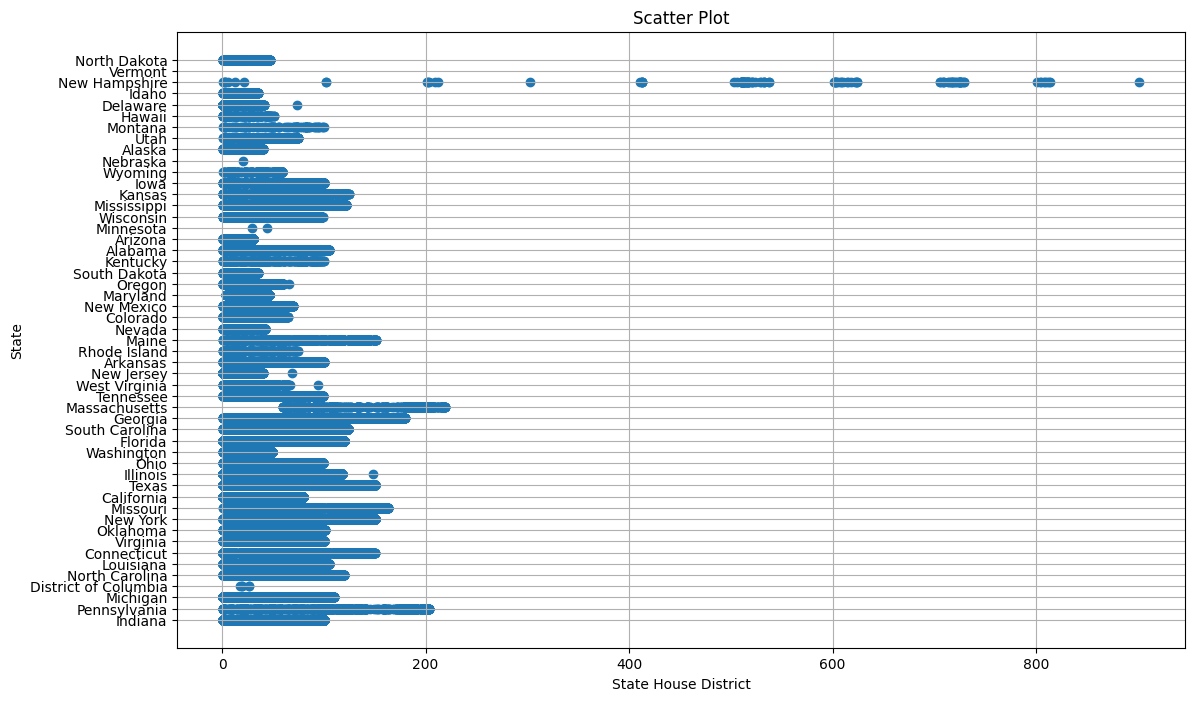

In [44]:
scatterplot_func(dataframe_to_plot=incidents, column_1="state_house_district", column_2="state",
                 figsize=(13, 8), xlabel="State House District", ylabel="State", title="Scatter Plot", show_grid=True)

We do the same for the *state_senate_district* column and see that, although slightly cleaner, the data have the same problems as the column above.

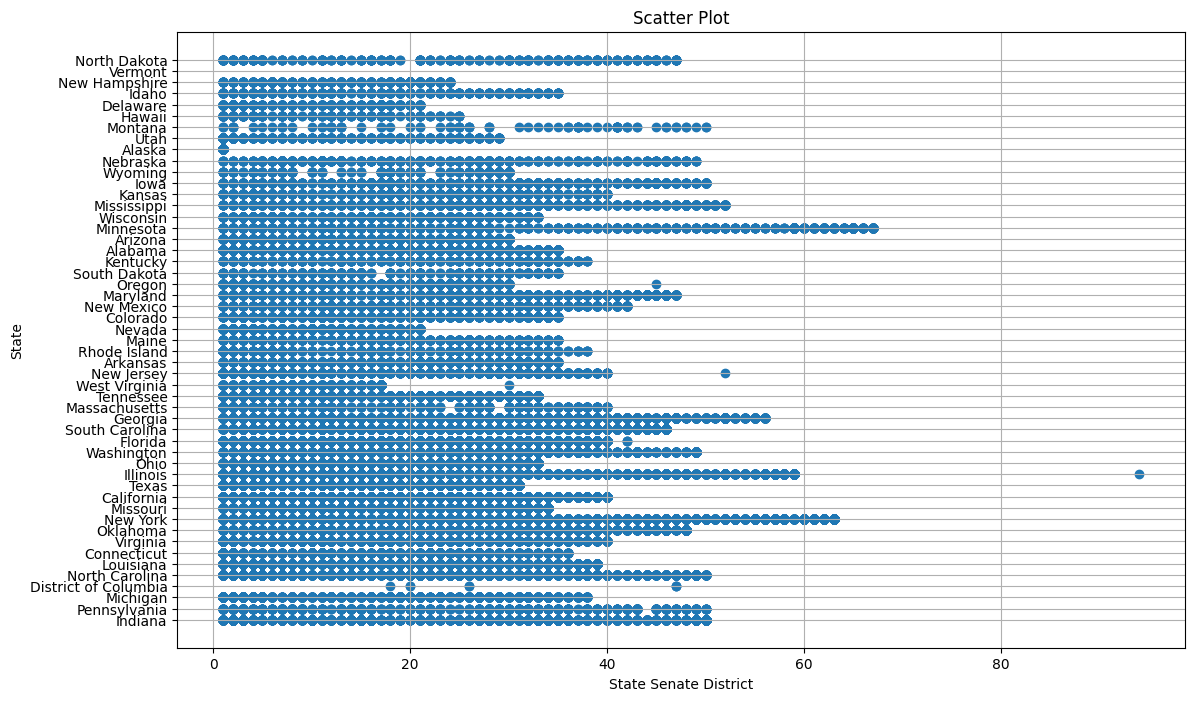

In [45]:
scatterplot_func(dataframe_to_plot=incidents, column_1="state_senate_district", column_2="state",
                 figsize=(13, 8), xlabel="State Senate District", ylabel="State", title="Scatter Plot", show_grid=True)

Another thing is that these two columns are not really useful for our analysis. In fact, these are used to determine the geographic locations of an incident. But several other pieces of information already exist to do this, such as *state*, *city_or_county*, *latitude*, *longitude* or *congressional_district* - and they all seem to be filled with more reliable and meaningful data. In effect, these columns merely represent another way of looking at the districts of each federal state, but while congressional districts may be useful to us, even simply for joining the two dataframes incidents and districts, these two columns are - for us - less useful in view of future analyses. We therefore decide to delete them.

In [46]:
incidents = incidents.drop(columns=['state_house_district'])
incidents = incidents.drop(columns=['state_senate_district'])

### Incidents - notes

We delete another column of the incidents dataframe: *notes*. We remove this column for multiple reasons:
- The types of information are not consistent with the rest of the dataset. In fact sometimes it presents as data a description of the incident, sometimes a summary of what is already expressed by the remaining columns, in a very subjective way. 
- We feel that we cannot treat this column by generalizing it to extract useful information. 
- The data it presents is very scattered as we can see by using the **describe()** command. Out of 160 thousand non-zero rows, there are 136 thousand different occurrences.

In [47]:
print(incidents["notes"].describe())

incidents = incidents.drop('notes', axis='columns')

count       158571
unique      136435
top       man shot
freq           524
Name: notes, dtype: object


### Incidents - incident_characteristics2

We will eliminate this column later, because we will analyze it together with its twin *incident_characteristics1*. The reasons why we will eliminate this column will be clarified later.

## Data Cleaning by Column

In this part - the largest part of data cleaning - we are going to take each column of the three dataframes and analyze it, trying to find possible outliers or errors and eliminate them. We will analyze the following columns:

- **Dataframe: Incidents**
    1. *date*
    2. *state*
    3. *city_or_county*
    4. *congressional_district*
    5. *n_participants*
    6. *min_age_participants*
    7. *avg_age_participants*
    8. *max_age_participants*
    9. *n_participant_child*
    10. *n_participant_teen*
    11. *n_participant_adult*
    12. *n_male*
    13. *n_female*
    14. *n_killed*
    15. *n_injured*
    16. *n_unharmed*
    17. *n_arrested*
    18. *incident_characteristics1*
    19. *latitude*
    20. *longitude*
    
- **Dataframe: Poverty**
    1. *year*
    2. *state*
    3. *povertyPercentage*

- **Dataframe: District**
    1. *year*
    2. *state*
    3. *congressional_district*
    4. *party*
    5. *candidatevotes*
    6. *totalvotes*

### Incidents - date

The first thing that we do is divide the date column into three different columns *year*, *month* and *day* and delete the *date* column. We do this because we will use the *year* column to merge the different dataframes and for other reasons that will be made clear later.

In [48]:
# Extract year, months and days from the dates and drop the date column
incidents['day'] = incidents['date'].dt.day
incidents['week']=incidents['date'].dt.isocalendar().week
incidents['month'] = incidents['date'].dt.month
incidents['year']=incidents['date'].dt.isocalendar().year

incidents = incidents.drop('date', axis='columns')

In [49]:
#Resorting dataframe
columns_order = ['year','month','week','day'] + [col for col in incidents.columns if col not in ['year','month','week','day']]
incidents = incidents[columns_order]

Now we move on to check that the dates - year, month and day - in these new columns are consistent with the dataset and well defined  - there should not be a date indicating May 41 for example. We first analyze the *year* column.

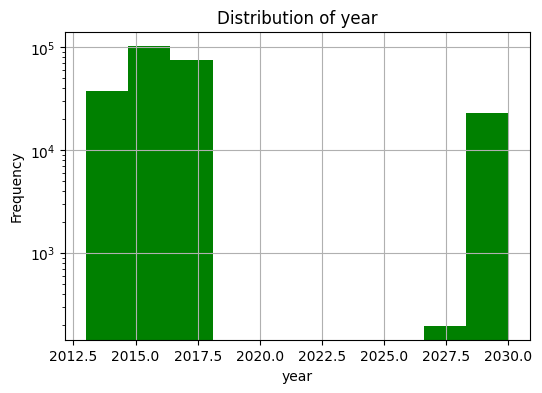

year
2017    61051
2016    58543
2015    45428
2014    37324
2029    14080
2018    13801
2030     8752
2013      250
2028      195
Name: count, dtype: Int64

In [50]:
histogram_func(dataframe_to_plot=incidents, columns_to_plot='year', figsize=(6, 4),
               title="Distribution of year", xlabel="year", ylabel="Frequency", 
               show_grid=True, color='green', ylog=True)

incidents["year"].value_counts()

As we can actually see, the years in the dataframe take values that vary between 2013 and 2030. In particular, all the years from 2013 to 2018 are present, after which there is a ten-year jump and we have the years 2028, 2029, and 2030. Since these three years are clearly wrong, we can assume - and we'd better do so, otherwise the whole dataset would have to be questioned - that the mistake consists only in the bad inclusion of a single digit, specifically the third one - that of the tens digit. 

So the idea now is to change the tens digit for the wrong years. This could be replaced in two main ways. In fact, we could make it become 2028 or 2018 or 2008. Same for 2029 and 2030. The latter could also take on an extra value, in fact it could become 2000, 2010 or 2020. We therefore make two observations:

- It would make sense to give a sense of continuity to the dataset. Assuming 2028=2008, 2029=2019, 2030=2000 is possible, but it does not seem logical seeing the other years in the dataset that are homogeneously distributed among the years from 2013 to 2018 - and thus consecutive years. Considering this, the most logical choice would be to have this consecutive streak continue and assume 2028=2018, 2029=2019, 2030=2020.

- The other datasets have data that vary between different years, all of which go up to 2020. It would make sense to think that the first dataset also contains data going up to that year. The most logical choice remains the one above.

Given the considerations above, let us change the data by transforming the years as follows: 2028=2018, 2029=2019, and 2030=2020.

In [51]:
incidents['year'] = incidents['year'].replace("2028", "2018")
incidents['year'] = incidents['year'].replace("2029", "2019")
incidents['year'] = incidents['year'].replace("2030", "2020")

To conclude we show that also the data in *month* and *day* columns are completely clean and so we print a bar chart showing for each month which days and how many days there are. We do this just to show that there are actually 12 months - January through December - and that each month does not exceed the number of days allowed.

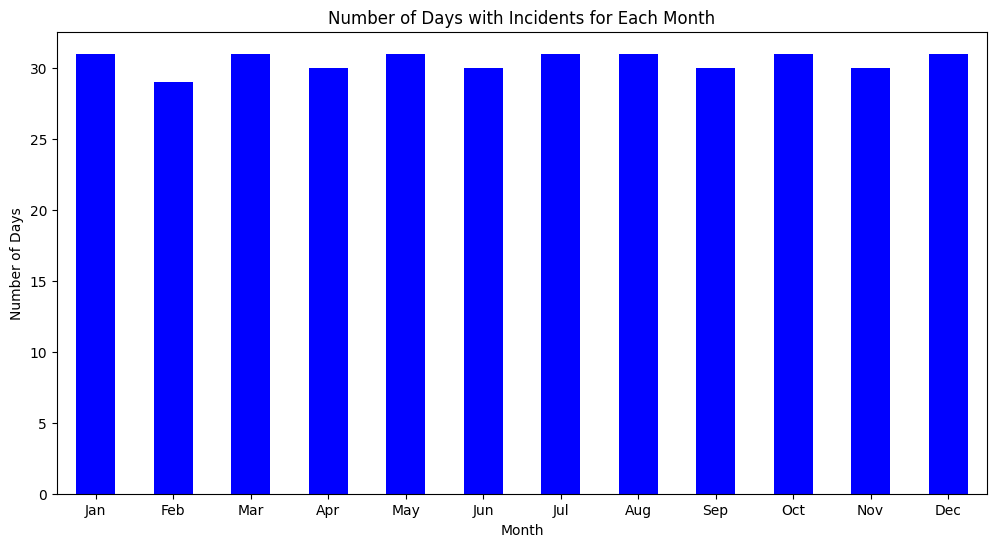

In [52]:
# Find the number of unique days for each month
days_per_month = incidents.groupby('month')['day'].nunique()

ticksname=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

barchart_func(data_to_plot=days_per_month,
              figsize=(12, 6),
              ticksrange=range(0, 12),
              ticksname=ticksname,
              title='Number of Days with Incidents for Each Month',
              xlabel='Month',
              ylabel='Number of Days')


### Poverty and District - year

This column presents the years in which data are collected. Our analysis on this column will then be trivially to check that the dates entered are well-defined, consecutive, and how many are not NaN. 

In [53]:
print("NaN values in poverty dataframe", poverty['year'].isna().sum())
print("NaN values in district dataframe", district['year'].isna().sum())

NaN values in poverty dataframe 0
NaN values in district dataframe 0


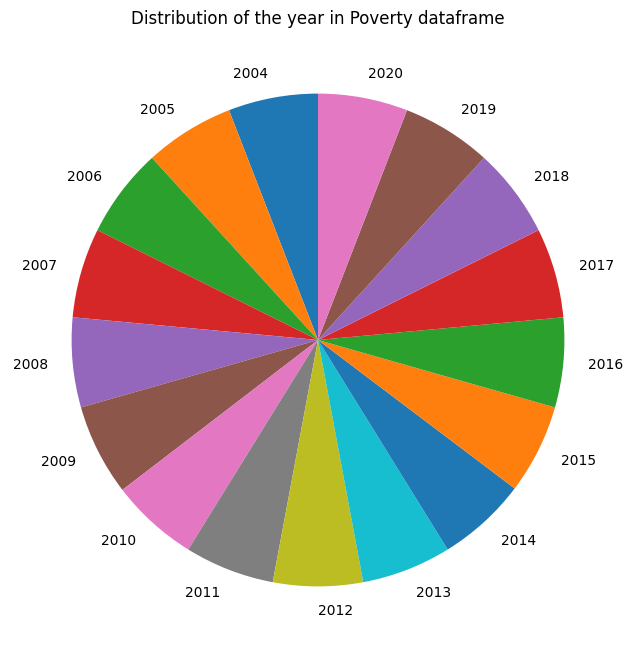

year
2004    52
2005    52
2006    52
2007    52
2008    52
2009    53
2010    51
2011    52
2012    52
2013    52
2014    52
2015    52
2016    52
2017    52
2018    52
2019    52
2020    52
Name: count, dtype: int64


In [54]:
year_counts_sorted = poverty['year'].value_counts().sort_index()

pieplot_func(value_counts_to_plot=year_counts_sorted.values, labels=year_counts_sorted.index, 
             title="Distribution of the year in Poverty dataframe", autopct_value=None, labeldistance=1.1)

print(year_counts_sorted)

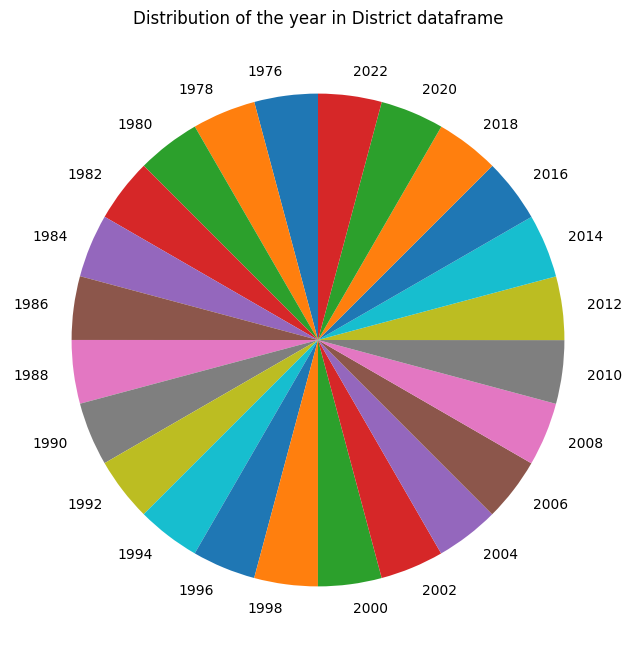

year
1976    435
1978    435
1980    435
1982    435
1984    435
1986    435
1988    435
1990    435
1992    435
1994    435
1996    435
1998    435
2000    435
2002    435
2004    435
2006    435
2008    435
2010    435
2012    435
2014    435
2016    435
2018    435
2020    436
2022    435
Name: count, dtype: int64


In [55]:
year_counts_sorted = district['year'].value_counts().sort_index()

# Chiamata alla tua funzione pieplot_func
pieplot_func(value_counts_to_plot=year_counts_sorted.values, labels=year_counts_sorted.index, 
             title="Distribution of the year in District dataframe", autopct_value=None, labeldistance=1.1)

print(year_counts_sorted)

We see how indeed no null values are present in these columns. We also see how the values of the years in the poverty dataframe are well defined and consecutive, as they range from 2004 to 2020. In contrast, as far as the district dataframe is concerned, the values are well-defined and in their own way they are also consecutive. In fact they take into account the values from 1976 to 2022, but skipping the odd-numbered years. This is simply because these are the years in which congressional elections take place in the united states, so it is only fair that the values go from year to year.

### Incidents, Poverty and District - state
Let us now check the *state* column. In this case, since it is a finite data type we can move on to analyze this column in a simple way, printing out the different types of instance. With the pandas **unique()** command we save all the different instances of states in the Incidents dataset into a list. So, as we can see with the following prints, all 50 federal states of the U.S. are then present, to which an instance is added for the *District of Columbia*, also known as Washington D.C. - the capital city.

In [56]:
column_states=incidents["state"].unique()
column_states.sort()
print("The number of different states in the incidents dataset is:", column_states.size)
print()
print("The states that appear in the state column of the incidents dataset are:")
print(column_states)

The number of different states in the incidents dataset is: 51

The states that appear in the state column of the incidents dataset are:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'Utah' 'Vermont' 'Virginia'
 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


Instead in the poverty dataframe there are 52 types of states. Unlike before, in fact the United States instance is added. In this case we print how many times each data istances appears in the table to see that United States is not a typo. But in fact it is printed exactly the same number of times as the other data. So again the printing of the datum is intentional, and we leave it in the table.

Achtung: when we will join the tables we will decide not to consider the occurrences of United States at all, just we will join the tables following the *state* occurrences in the incidents table.

In [57]:
column_states=poverty["state"].unique()
column_states.sort()
print("The number of different states in the poverty dataset is:", column_states.size)
print()
print("The states that appear in the state column of the poverty dataset are:")
print(column_states)

The number of different states in the poverty dataset is: 52

The states that appear in the state column of the poverty dataset are:
['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'District of Columbia' 'Florida' 'Georgia'
 'Hawaii' 'Idaho' 'Illinois' 'Indiana' 'Iowa' 'Kansas' 'Kentucky'
 'Louisiana' 'Maine' 'Maryland' 'Massachusetts' 'Michigan' 'Minnesota'
 'Mississippi' 'Missouri' 'Montana' 'Nebraska' 'Nevada' 'New Hampshire'
 'New Jersey' 'New Mexico' 'New York' 'North Carolina' 'North Dakota'
 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania' 'Rhode Island' 'South Carolina'
 'South Dakota' 'Tennessee' 'Texas' 'United States' 'Utah' 'Vermont'
 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']


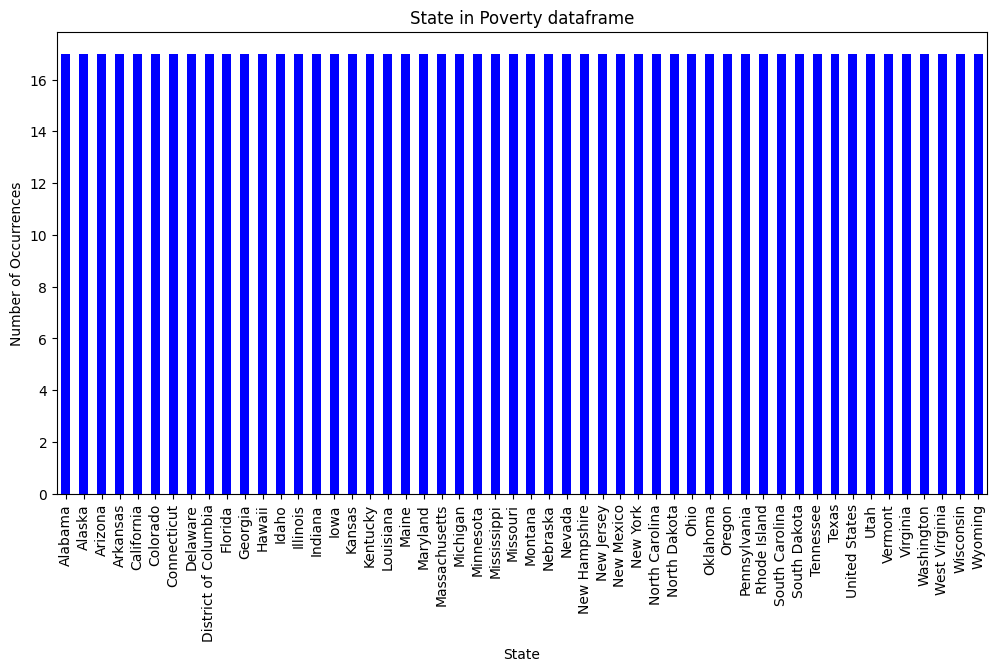

In [58]:
data_by_state = poverty.groupby('state').size()

barchart_func(data_to_plot=data_by_state,
              ticksrange=range(len(data_by_state)),
              ticksname=data_by_state.index,
              title='State in Poverty dataframe',
              xlabel="State",
              ylabel="Number of Occurrences",
              rotation=90
              )

Finally we do the same with the district dataframe. In this case we again have 51 different states, the same as in the incidents and poverty dataframes. These are actually transcribed in block letters, not in lower case as in the other cases, but this will not be a problem: when we do the join of the tables the algorithm will recognize that two equal states are the same even if one is written in lower case and one in block letters.

In [59]:
column_states=district["state"].unique()
column_states.sort()
print("The number of different states in the district dataset is:", column_states.size)
print()
print("The states that appear in the state column of the district dataset are:")
print(column_states)

The number of different states in the district dataset is: 51

The states that appear in the state column of the district dataset are:
['ALABAMA' 'ALASKA' 'ARIZONA' 'ARKANSAS' 'CALIFORNIA' 'COLORADO'
 'CONNECTICUT' 'DELAWARE' 'DISTRICT OF COLUMBIA' 'FLORIDA' 'GEORGIA'
 'HAWAII' 'IDAHO' 'ILLINOIS' 'INDIANA' 'IOWA' 'KANSAS' 'KENTUCKY'
 'LOUISIANA' 'MAINE' 'MARYLAND' 'MASSACHUSETTS' 'MICHIGAN' 'MINNESOTA'
 'MISSISSIPPI' 'MISSOURI' 'MONTANA' 'NEBRASKA' 'NEVADA' 'NEW HAMPSHIRE'
 'NEW JERSEY' 'NEW MEXICO' 'NEW YORK' 'NORTH CAROLINA' 'NORTH DAKOTA'
 'OHIO' 'OKLAHOMA' 'OREGON' 'PENNSYLVANIA' 'RHODE ISLAND' 'SOUTH CAROLINA'
 'SOUTH DAKOTA' 'TENNESSEE' 'TEXAS' 'UTAH' 'VERMONT' 'VIRGINIA'
 'WASHINGTON' 'WEST VIRGINIA' 'WISCONSIN' 'WYOMING']


### Incidents - city_or_county

Let's talk about the column *city_or_county*. First we print out how many city appear once in the dataset. As we can see there are not so much different city in the dataset: 4970 - a small number if it is related to the dimension of the incidents dataset. After that we go on to print the first 10 values of the **value_counts()** function. 

We would also like to point out the importance of the *city_or_county* column by saying that along with the *date* column and the *state* column are the only columns without null data initially in the incidents dataset. 

In [60]:
count=(incidents["city_or_county"].value_counts() == 1).sum()
print("We print the number of addresses that appear only once in the dataset:", count)
print()
print(incidents["city_or_county"].value_counts().head(10))

We print the number of addresses that appear only once in the dataset: 4970

city_or_county
Chicago         10813
Baltimore        3922
Washington       3265
New Orleans      3083
Philadelphia     2962
Saint Louis      2494
Milwaukee        2487
Houston          2484
Jacksonville     2447
Memphis          2386
Name: count, dtype: int64


The last thing that could be done for the *city_or_county* column, to check that all the names actually refer to actually existing cities or counties, would be to download an external list with the names of cities and counties in the United States. In fact, we'll do something similar later, so we'll leave this task pending and come back to it later.

### Incidents and District - congressional_district

This column represents the congressional districts in which the incidents occur. Every federal state has at least one congressional district - most states have more than one - and the maximum number of congressional districts a federal state had in the time period considered in the dataset is 53, the number of congressional districts California had in 2020. So the first check we do on this column is all numbers are between 1 and 53. In fact, each number in this column is associated with the *state* column of the same row, so if we find in a row with state **X** and with congressional district **Y**, this means that the incident occurred in the **Y**th congressional district of state **X**. 

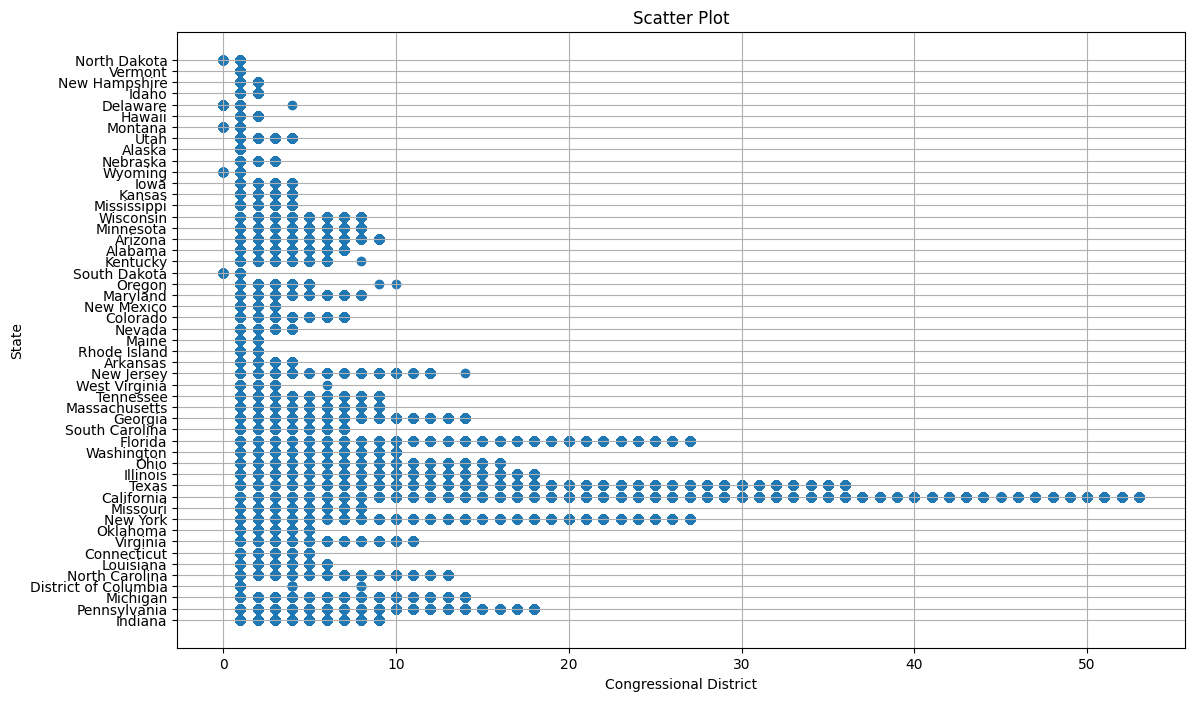

0.0
53.0


In [61]:
scatterplot_func(dataframe_to_plot=incidents, column_1="congressional_district", column_2="state",
                 figsize=(13, 8), xlabel="Congressional District", ylabel="State", title="Scatter Plot", show_grid=True)

print(incidents['congressional_district'].min())
print(incidents['congressional_district'].max())

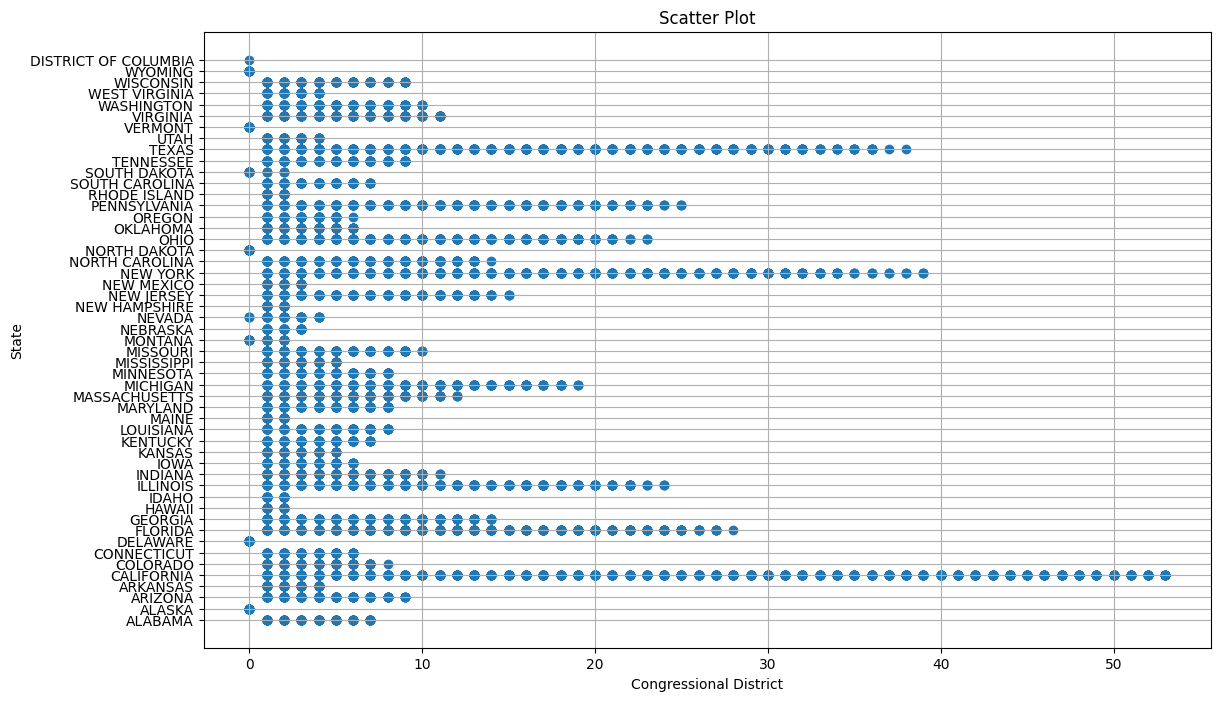

0
53


In [62]:
scatterplot_func(dataframe_to_plot=district, column_1="congressional_district", column_2="state",
                 figsize=(13, 8), xlabel="Congressional District", ylabel="State", title="Scatter Plot", show_grid=True)

print(district['congressional_district'].min())
print(district['congressional_district'].max())

As we see, however, in both the incidents and district dataframes, we also have 0 as an occurrence of value in the *congressional_district* column. Let us therefore print what states this value is associated with.

In [63]:
district_0 = incidents[incidents['congressional_district'] == 0]['state'].unique()
print("The states associated with the value 0 of congressional district in the incidents dataframe are:")
print(district_0)
print()
district_0 = district[district['congressional_district'] == 0]['state'].unique()
print("The states associated with the value 0 of congressional district in the district dataframe are")
print(district_0)

The states associated with the value 0 of congressional district in the incidents dataframe are:
['Montana' 'North Dakota' 'Delaware' 'Wyoming' 'South Dakota']

The states associated with the value 0 of congressional district in the district dataframe are
['ALASKA' 'DELAWARE' 'NEVADA' 'NORTH DAKOTA' 'VERMONT' 'WYOMING'
 'SOUTH DAKOTA' 'MONTANA' 'DISTRICT OF COLUMBIA']


With a simple search you can see how all the states associated with 0 are actually states with a single congressional district. So it is not wrong to turn these values from 0 to 1 and thus correct the error. 

In [64]:
incidents['congressional_district'] = incidents['congressional_district'].replace(0, 1)
district['congressional_district'] = district['congressional_district'].replace(0, 1)

Let us finally turn to see how many null values there are in the *congressional_district* columns for the two dataframes.

In [65]:
print("incidents dataframe:", incidents["congressional_district"].isna().sum())
print("district dataframe:", district["congressional_district"].isna().sum())

incidents dataframe: 11943
district dataframe: 0


So in district dataframe there are no null values, while in incidents dataframe there are about ten thousand null values, which represents about five percent of the total size of the dataframe. Since such a number is small relative to the size of the dataframe we go on to eliminate the columns in which congressional district is NaN.

In [66]:
incidents.dropna(subset=['congressional_district'], inplace=True)

### Incidents - n_participants

First we enter a command that transforms all negative values in the column to NaN - no incident can have a negative number of participants.

In [67]:
incidents["n_participants"].mask(incidents['n_participants'] < 0, inplace=True)

Then we move on to make all values that are 0 become NaN: in fact, in our dataset there are incidents that occurred with guns, so we do not want there to be any incidents with zero participants.

Thus we can see how 24630 values have now become NaN - and before they were 0.

In [68]:
print(incidents['n_participants'].isna().sum())
incidents['n_participants'].replace(0, np.nan, inplace=True)
print(incidents['n_participants'].isna().sum())

0
23373


Let's move on to plotting the boxplot to identify other potential outliers. We can observe that there are additional outliers, specifically the data points where participants exceed the limit of 16. Therefore, we will treat these outliers by replacing those values with NaN.

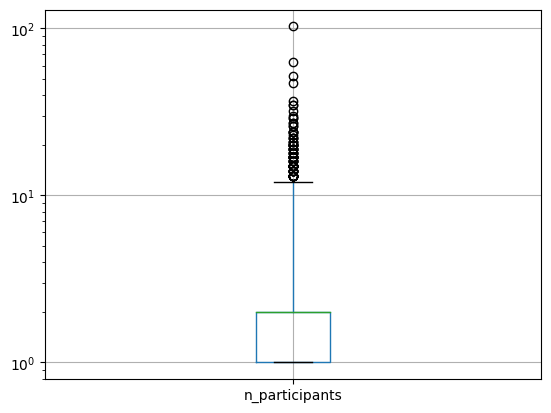

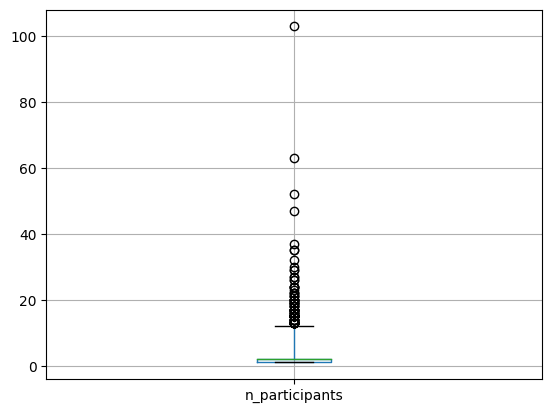

In [69]:
boxplot_func(columns_of_interest=["n_participants"], data_frame=incidents, whis=10, yscale="log")
boxplot_func(columns_of_interest=["n_participants"], data_frame=incidents, whis=10, yscale="linear")

In [70]:
incidents["n_participants"].mask(incidents['n_participants'] > 16, inplace=True)

Finally we go on to delete all rows where *n_participats* is NaN, as they do not represent reliable data for our dataset, and print a histogram showing the distribution of values in the column.

In [71]:
print(incidents['n_participants'].isna().sum())
incidents.dropna(subset=['n_participants'], inplace=True)

23422


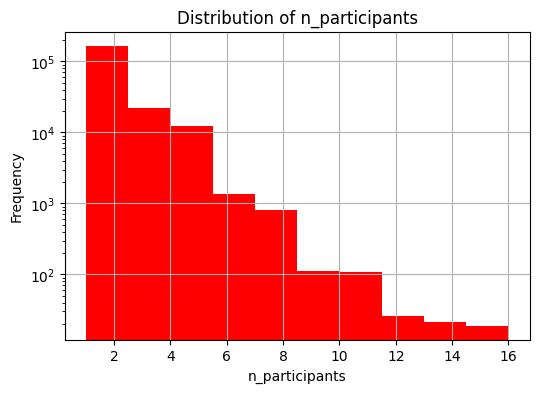

In [72]:
histogram_func(dataframe_to_plot=incidents, columns_to_plot='n_participants', figsize=(6, 4),
               title="Distribution of n_participants", xlabel="n_participants", ylabel="Frequency", 
               show_grid=True, color='red', ylog=True)

### Incidents - min_age_participants, avg_age_participants, max_age_participants

First we enter a command that transforms all negative values in the columns to NaN - nobody can have a negative age.

In [73]:
incidents["min_age_participants"].mask(incidents['min_age_participants'] < 0, inplace=True)
incidents["avg_age_participants"].mask(incidents['avg_age_participants'] < 0, inplace=True)
incidents["max_age_participants"].mask(incidents['max_age_participants'] < 0, inplace=True)

We then move on to make the values in the rows where *min_age_participants* is greater than *max_age_participants* become null.

In [74]:
mask_invalid_age = incidents['min_age_participants'] > incidents['max_age_participants']
incidents.loc[mask_invalid_age, ['min_age_participants', 'avg_age_participants', 'max_age_participants']] = np.nan

Then we check the columns for other outliers, and to do this we print a boxplot for each column.

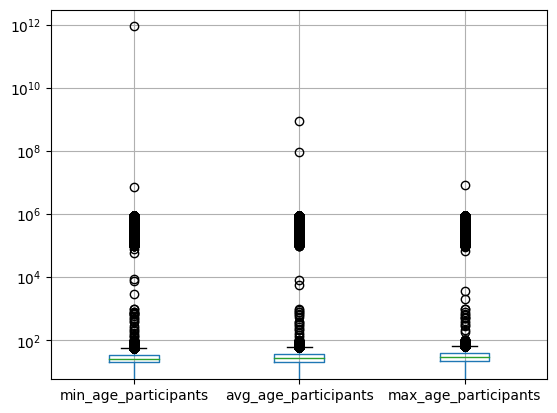

In [75]:
columns_of_interest=["min_age_participants", "avg_age_participants", "max_age_participants"]

boxplot_func(columns_of_interest=columns_of_interest, data_frame=incidents, whis=1.5, yscale="log")

As can be seen there are actually a large number of outliers in all three columns. We therefore decide in all three columns to make the values that exceed the threshold of 88 become NaN.

In [76]:
incidents["min_age_participants"].mask(incidents['min_age_participants'] > 88, inplace=True)
incidents["avg_age_participants"].mask(incidents['avg_age_participants'] > 88, inplace=True)
incidents["max_age_participants"].mask(incidents['max_age_participants'] > 88, inplace=True)

We finally print at the end of our cleaning how many values are NaN in these three columns.

In [77]:
null_counts_min_age = incidents["min_age_participants"].isna().sum()
null_counts_avg_age = incidents["avg_age_participants"].isna().sum()
null_counts_max_age = incidents["max_age_participants"].isna().sum()

print(f"min_age_participants': {null_counts_min_age}")
print(f"avg_age_participants': {null_counts_avg_age}")
print(f"max_age_participants': {null_counts_max_age}")

min_age_participants': 65099
avg_age_participants': 65109
max_age_participants': 65176


Because the number of rows with null data is significant relative to the size of the dataframe, instead of eliminating the rows with missing data, in this case we replace the NaN values in these columns with the median of the non-null values in the columns. This operation will allow us to remain without null values, while at the same time not changing the results of future statistical analysis.

In [78]:
fill_median(data_frame=incidents, column_to_fill="min_age_participants")
fill_median(data_frame=incidents, column_to_fill="avg_age_participants")
fill_median(data_frame=incidents, column_to_fill="max_age_participants")

In [79]:
mask_invalid_age = incidents['min_age_participants'] > incidents['max_age_participants']
incidents.loc[mask_invalid_age, ['min_age_participants', 'avg_age_participants', 'max_age_participants']] = np.nan

incidents.dropna(subset=['min_age_participants'], inplace=True)
incidents.dropna(subset=['max_age_participants'], inplace=True)


We round the *min_age_participants* and *max_age_participants* columns to integers again, since having substituted in some rows the median we could have found float numbers in columns where we expect to find integers.

In [80]:
columns_to_round = ['min_age_participants', 'max_age_participants']

incidents[columns_to_round] = incidents[columns_to_round].round()

Finally, we print the histogram of the three columns to show their distribution graphically.

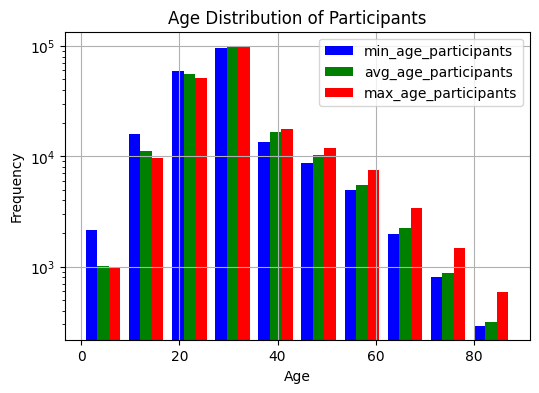

In [81]:
histogram_func2(dataframe_to_plot=incidents, columns_to_plot=['min_age_participants', 'avg_age_participants', 'max_age_participants'], 
                figsize=(6, 4), colors=['blue', 'green', 'red'], title='Age Distribution of Participants', xlabel='Age', 
                ylabel='Frequency', show_grid=True, ylog=True)

### Incidents - n_participants_child, n_participants_teen, n_participants_adult

The first thing we do is to transform the data in the *n_participatns_child*, *n_participants_teen* and *n_participants_adult* columns to NaN when any of the following conditions occur:
- the value in the data is less than 0;
- the value in the data is greater than the value in the *n_participants* data in the same column;
- the sum of the values in the three columns is greater than the value in *n_participants*. 

In [82]:
incidents['n_participants_child'].mask(incidents['n_participants_child'] < 0, np.nan, inplace=True)
incidents['n_participants_teen'].mask(incidents['n_participants_teen'] < 0, np.nan, inplace=True)
incidents['n_participants_adult'].mask(incidents['n_participants_adult'] < 0, np.nan, inplace=True)

incidents['n_participants_child'].mask(incidents['n_participants_child'] > incidents['n_participants'], np.nan,  inplace=True)
incidents['n_participants_teen'].mask(incidents['n_participants_teen'] > incidents['n_participants'], np.nan, inplace=True)
incidents['n_participants_adult'].mask(incidents['n_participants_adult'] > incidents['n_participants'], np.nan, inplace=True)

mask_sum_greater=incidents['n_participants_child']+incidents['n_participants_teen']+incidents['n_participants_adult'] > incidents['n_participants']
incidents.loc[mask_sum_greater, ['n_participants_child', 'n_participants_teen', 'n_participants_adult']] = np.nan

We now look for possible outliers in these columns using the boxplot and **value_count()**.

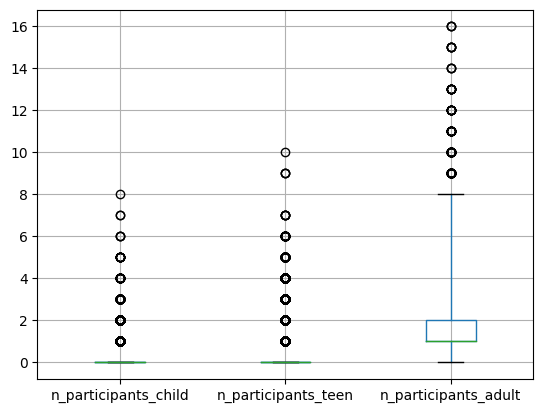

In [83]:
columns_of_interest=["n_participants_child", "n_participants_teen", "n_participants_adult"]

boxplot_func(columns_of_interest=columns_of_interest, data_frame=incidents, whis=6, yscale="linear")

In [84]:
print(incidents['n_participants_child'].value_counts())
print(incidents['n_participants_teen'].value_counts())

n_participants_child
0.0    183996
1.0      2885
2.0       507
3.0        82
4.0        23
5.0        10
6.0         3
7.0         2
8.0         1
Name: count, dtype: int64
n_participants_teen
0.0     169230
1.0      14097
2.0       3038
3.0        756
4.0        271
5.0         80
6.0         28
7.0          5
9.0          3
10.0         1
Name: count, dtype: int64


There are indeed outliers. Specifically, for the column *n_participants_child* we consider outliers to be the data that exceed the threshold of 2, for the column *n_participants_teen* we consider outliers to be the data that exceed the threshold of 4, and for the column *n_participants_adult* to be the data that exceed the threshold of 8. We set the following values to NaN.

In [85]:
incidents['n_participants_child'].mask(incidents['n_participants_child'] > 2, np.nan, inplace=True)
incidents['n_participants_teen'].mask(incidents['n_participants_teen'] > 4, np.nan, inplace=True)
incidents['n_participants_adult'].mask(incidents['n_participants_adult'] > 8, np.nan, inplace=True)

We then check how many data are now null in these columns, and how many of these are in common.

In [86]:
print(incidents[["n_participants_child", "n_participants_teen", "n_participants_adult"]].isna().sum())

nulls_in_common = incidents[["n_participants_child", "n_participants_teen", "n_participants_adult"]].isna().all(axis=1).sum()
print(f"Number of rows null in common: {nulls_in_common}")

n_participants_child    16615
n_participants_teen     16611
n_participants_adult    16624
dtype: int64
Number of rows null in common: 16494


As we can see the rows where they are null are virtually all in common, and being a small number compared to the size of the datafame, we proceed to delete these rows. 

In [87]:
incidents.dropna(subset=['n_participants_adult'], inplace=True)
incidents.dropna(subset=['n_participants_teen'], inplace=True)
incidents.dropna(subset=['n_participants_child'], inplace=True)
print(incidents[["n_participants_child", "n_participants_teen", "n_participants_adult"]].isna().sum())

n_participants_child    0
n_participants_teen     0
n_participants_adult    0
dtype: int64


Before closing this section, let's make one last remark. These three columns should be a partition of *n_participants*, so their sum should make exactly the value in *n_participants*. We then check in how many cases this actually happens, and see that the sum is right 90% of the time. In any case, we do not worry about the cases in which this does not happen, since later we will turn these three columns into a single indicator and so these errors will be approximated. 

In [88]:
#create a new column 'sum_agegroup_is_ok' with initial values False
incidents['sum_agegroup_is_ok'] = False

#check if the sum of the columns is equal to 'n_participants' and set 'sum_agegroup_is_ok' to True if yes
condition = (incidents['n_participants_child'] + incidents['n_participants_teen'] + incidents['n_participants_adult'] == incidents['n_participants'])
incidents.loc[condition, 'sum_agegroup_is_ok'] = True

print("Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:")
print(incidents['sum_agegroup_is_ok'].value_counts())

incidents = incidents.drop('sum_agegroup_is_ok', axis='columns')

Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:
sum_agegroup_is_ok
True     168665
False     18476
Name: count, dtype: int64


Finally, let us print a pie chart and a histrogram showing the age distribution in incidents.

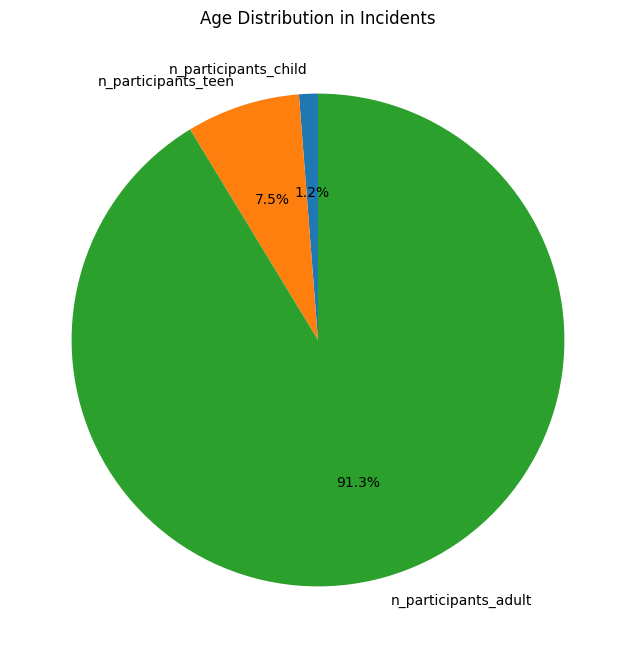

In [89]:
labels=["n_participants_child", "n_participants_teen", "n_participants_adult"]
total_n_child = incidents["n_participants_child"].sum()
total_n_teen = incidents["n_participants_teen"].sum()
total_n_adult = incidents["n_participants_adult"].sum()
sizes=[total_n_child, total_n_teen, total_n_adult]

pieplot_func(value_counts_to_plot=sizes, labels=labels, title="Age Distribution in Incidents")

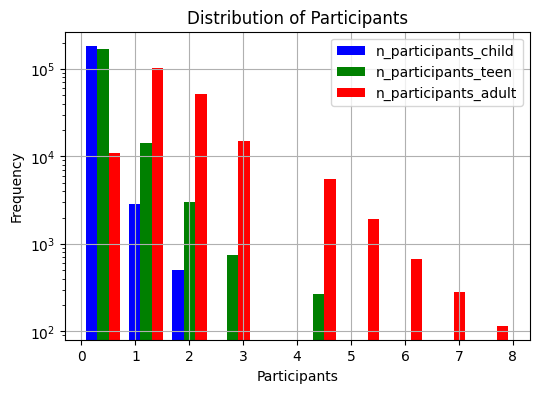

In [90]:
histogram_func2(dataframe_to_plot=incidents, columns_to_plot=['n_participants_child', 'n_participants_teen', 'n_participants_adult'], 
                figsize=(6, 4), colors=['blue', 'green', 'red'], title='Distribution of Participants', xlabel='Participants', 
                ylabel='Frequency', show_grid=True, ylog=True)

### Incidents - n_males, n_females

We do the same reasoning as above for these two columns. We first apply the **mask()** and then use the boxplot to look for possible outliers.

In [91]:
incidents["n_males"].mask(incidents['n_males'] < 0, inplace=True)
incidents["n_females"].mask(incidents['n_females'] < 0, inplace=True)

incidents["n_males"].mask(incidents['n_males'] > incidents['n_participants'], inplace=True)
incidents["n_females"].mask(incidents['n_females'] > incidents['n_participants'], inplace=True)

mask_sum_greater_than_participants = incidents['n_males'] + incidents['n_females'] > incidents['n_participants']
incidents.loc[mask_sum_greater_than_participants, ['n_males', 'n_females']] = np.nan


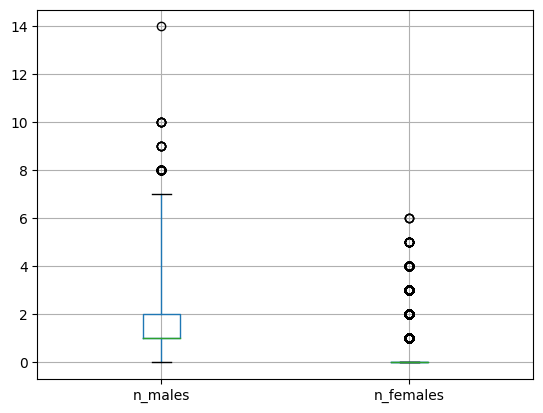

In [92]:
columns_of_interest=["n_males", "n_females"]

boxplot_func(columns_of_interest=columns_of_interest, data_frame=incidents, whis=5, yscale="linear")

In [93]:
incidents["n_females"].value_counts()

n_females
0.0    148210
1.0     30378
2.0      3291
3.0       502
4.0        94
5.0        15
6.0         3
Name: count, dtype: int64

Also in this case we move on to set to NaN the outliers.

In [94]:
incidents['n_males'].mask(incidents['n_males'] > 7, np.nan, inplace=True)
incidents['n_females'].mask(incidents['n_females'] > 3, np.nan, inplace=True)

So, again let's go and print how many null values are in these columns and how many are in common.

In [95]:
print(incidents[["n_males", "n_females"]].isna().sum())

nulls_in_common = incidents[["n_males", "n_females"]].isna().all(axis=1).sum()
print(f"Number of rows null in common: {nulls_in_common}")

n_males      4710
n_females    4760
dtype: int64
Number of rows null in common: 4649


It is very little data compared to the dataframe and all in common, so we move on to delete it.

In [96]:
incidents.dropna(subset=['n_males'], inplace=True)
incidents.dropna(subset=['n_females'], inplace=True)
print(incidents[["n_males", "n_females"]].isna().sum())

n_males      0
n_females    0
dtype: int64


We close by doing the same check as we did for the three columns above, and we see that there are few data in which the sum of *n_males* and *n_females* is different from *n_participants*.

In [97]:
#create a new column 'sum_gender_is_ok' with initial values False
incidents['sum_gender_is_ok'] = False

#check if the sum of the columns is equal to 'n_participants' and set 'sum_gender_is_ok' to True if yes
condition = (incidents['n_males'] + incidents['n_females'] == incidents['n_participants'])
incidents.loc[condition, 'sum_gender_is_ok'] = True

print("Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:")
print(incidents['sum_gender_is_ok'].value_counts())

incidents = incidents.drop('sum_gender_is_ok', axis='columns')

Print how many values are right, how many are wrong, and how many do not have enough values to be calculated:
sum_gender_is_ok
True     168366
False     13954
Name: count, dtype: int64


Finally, let us print a pie chart and a histogram showing the gender distribution in incidents.

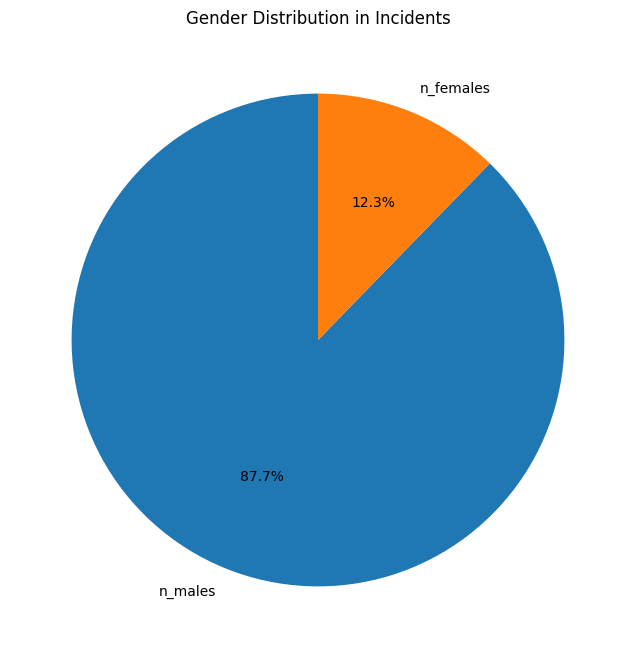

In [98]:
labels=["n_males", "n_females"]
total_n_males = incidents["n_males"].sum()
total_n_females = incidents["n_females"].sum()
sizes=[total_n_males, total_n_females]

pieplot_func(value_counts_to_plot=sizes, labels=labels, title="Gender Distribution in Incidents")

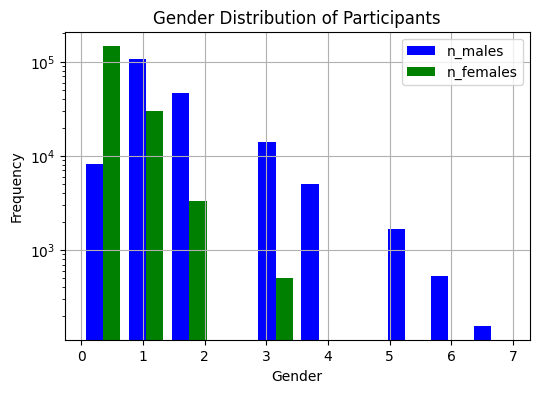

In [99]:
histogram_func2(dataframe_to_plot=incidents, columns_to_plot=['n_males', 'n_females'], figsize=(6, 4), 
                colors=['blue', 'green'], title='Gender Distribution of Participants', xlabel='Gender', 
                ylabel='Frequency', show_grid=True, ylog=True)

### Incidents - n_killed, n_injured, n_unharmed

For these three columns we also work similar as in the previous two sections. We then begin by applying the first masks and looking for possible outliers via boxplots.

In [100]:
incidents["n_killed"].mask(incidents['n_killed'] < 0, inplace=True)
incidents["n_injured"].mask(incidents['n_injured'] < 0, inplace=True)
incidents["n_unharmed"].mask(incidents['n_unharmed'] < 0, inplace=True)
                             
incidents['n_killed'].mask(incidents['n_killed'] > incidents['n_participants'], np.nan,  inplace=True)
incidents['n_injured'].mask(incidents['n_injured'] > incidents['n_participants'], np.nan, inplace=True)
incidents['n_unharmed'].mask(incidents['n_unharmed'] > incidents['n_participants'], np.nan, inplace=True)

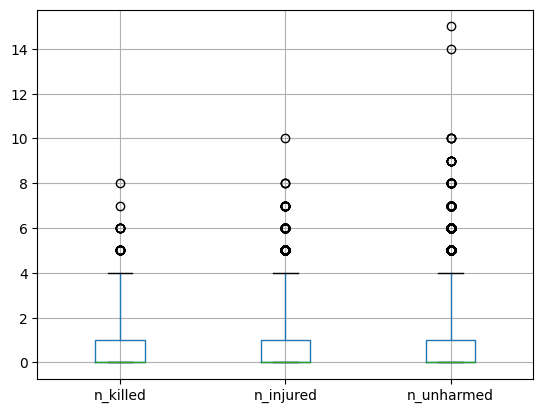

In [101]:
columns_of_interest=["n_killed", "n_injured", "n_unharmed"]

boxplot_func(columns_of_interest=columns_of_interest, data_frame=incidents, whis=3, yscale="linear")

Effectively we can say that there are outliers.

In [102]:
incidents['n_unharmed'].mask(incidents['n_unharmed'] > 4, np.nan, inplace=True)
incidents['n_injured'].mask(incidents['n_injured'] > 4, np.nan, inplace=True)
incidents['n_killed'].mask(incidents['n_killed'] > 4, np.nan, inplace=True)

We then count again how many null values there are and how many are in common among the three columns.

In [103]:
print(incidents[["n_killed", "n_injured", "n_unharmed"]].isna().sum())

nulls_in_common = incidents[["n_killed", "n_injured", "n_unharmed"]].isna().all(axis=1).sum()
print(f"Number of rows null in common: {nulls_in_common}")

n_killed        36
n_injured      261
n_unharmed    1662
dtype: int64
Number of rows null in common: 0


Again there are very few values, and all in common. We decide to delete these lines as in the previous cases.

In [104]:
incidents.dropna(subset=['n_unharmed'], inplace=True)
incidents.dropna(subset=['n_injured'], inplace=True)
incidents.dropna(subset=['n_killed'], inplace=True)
print(incidents[["n_killed", "n_injured", "n_unharmed"]].isna().sum())

n_killed      0
n_injured     0
n_unharmed    0
dtype: int64


Finally, let us print a pie chart and a histogram showing the distribution in incidents.

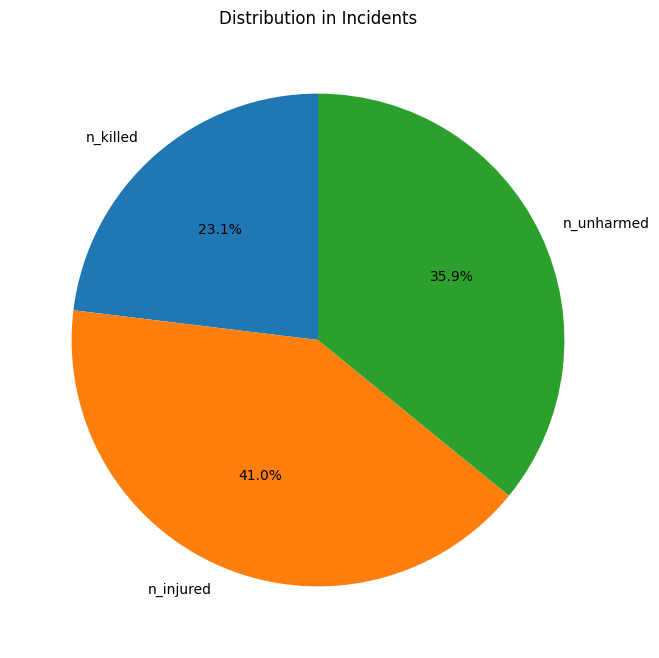

In [105]:
labels=["n_killed", "n_injured", "n_unharmed"]
total_n_killed = incidents["n_killed"].sum()
total_n_injured = incidents["n_injured"].sum()
total_n_unharmed = incidents["n_unharmed"].sum()
sizes=[total_n_killed, total_n_injured, total_n_unharmed]

pieplot_func(value_counts_to_plot=sizes, labels=labels, title="Distribution in Incidents")

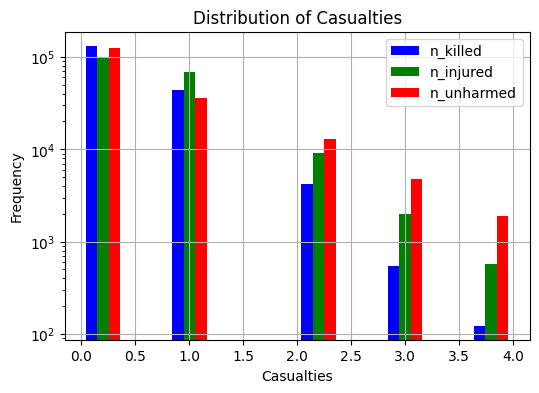

In [106]:
histogram_func2(dataframe_to_plot=incidents, columns_to_plot=['n_killed', 'n_injured', 'n_unharmed'], 
                figsize=(6, 4), colors=['blue', 'green', 'red'], title='Distribution of Casualties', xlabel='Casualties', 
                ylabel='Frequency', show_grid=True, ylog=True)

### Incidents - n_arrested
Let us now turn to checking the *n_arrested* column. We begin by turning all values less than 0 into NaN - there can be no less than zero arrested.

In [107]:
incidents["n_arrested"].mask(incidents['n_arrested'] < 0, inplace=True)

We proceed by printing the box plot of the column.

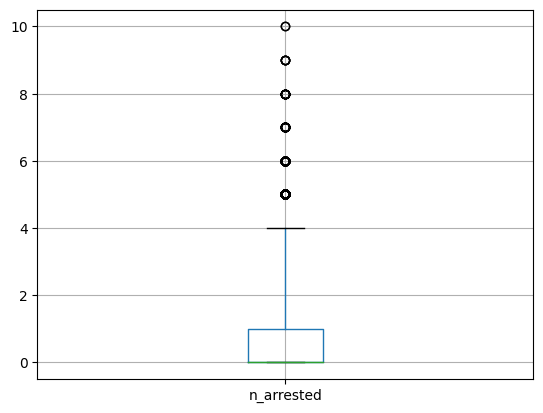

In [108]:
boxplot_func(columns_of_interest=["n_arrested"], data_frame=incidents, whis=3, yscale="linear")

We again set to NaN the outliers.

In [109]:
incidents["n_arrested"].mask(incidents['n_arrested'] > 4, inplace=True)

We move on by printing the number of null values.

In [110]:
print("n_arrested:", incidents["n_arrested"].isna().sum())

n_arrested: 481


Since there are only a small number of null rows - respecting the size of the dataframe - we decide to delete them directly, without having to later approximate the values within the column.

In [111]:
incidents.dropna(subset=["n_arrested"], inplace=True)

We close this section by printing the histogram to show the distribution of the column.

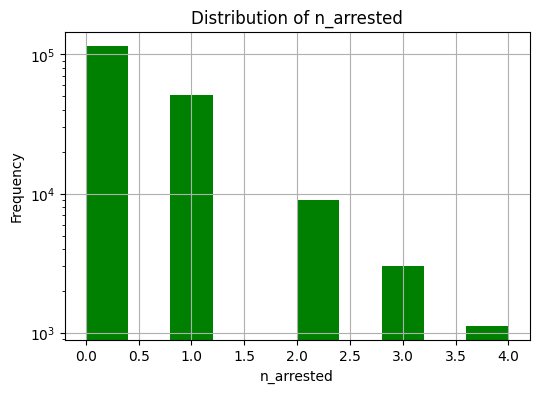

In [112]:
histogram_func(dataframe_to_plot=incidents, columns_to_plot='n_arrested', figsize=(6, 4),
               title="Distribution of n_arrested", xlabel="n_arrested", ylabel="Frequency", 
               show_grid=True, color='green', ylog=True)

### Incidents - incident_characteristics1, incident_characteristics2

These two columns show the characteristics of the incidents that occur in our dataset. We notice that there are far fewer null rows in *characteristic_incident1* than in *characteristic_incident2*. 

In [113]:
print("incident_characteristics1:", incidents["incident_characteristics1"].isna().sum())
print("incident_characteristics2:", incidents["incident_characteristics2"].isna().sum())

incident_characteristics1: 225
incident_characteristics2: 69230


Let us now exploring these columns then  by using the **describe()** command.

In [114]:
incidents[["incident_characteristics1", "incident_characteristics2"]].describe()

,incident_characteristics1,incident_characteristics2
count,179656,110651
unique,50,84
top,Shot - Wounded/Injured,Officer Involved Incident
freq,77833,11585


So as we can see the second column not only has many more null values, it is also much more sparse: in fact although we have many fewer non-null columns, it has almost twice as many different occurrences in the dataframe - 90 different occurrences versus 50 in the first column. This makes us think that we might want to eliminate this column, which contains only a little additional information to the first column, and often also little stastitically relevant information.

Before eliminating the second column, let's study the first one a little better.

In [115]:
characteristic_counts = incidents['incident_characteristics1'].value_counts()

# Filter values with counts greater than 500
filtered_characteristics = characteristic_counts[characteristic_counts > 100]

# Calculate the total sum of occurrences for filtered values
total_sum_filtered = incidents[incidents['incident_characteristics1'].isin(filtered_characteristics.index)]['incident_characteristics1'].count()

# Print the total sum
print("Total sum of occurrences for values with counts greater than 100:", total_sum_filtered)

Total sum of occurrences for values with counts greater than 100: 178706


As we can see the occurrences that appear at least 100 times in our dataframe cover about 99% of our dataframe. So, in view of these considerations we decide to do the following two operations:
- First, we eliminate all occurrences that do not appear at least 100 times in the dataframe - we consider them as outliers. By doing this we also print the number of rows that are NaN after this operation.
- After that we do a check. For each row in which the value under the *incident_characteristics1* column is NaN, we go to see if the value under the *incident_characteristics2* column is instead something that is already present in the *incident_characteristics1* column - basically something that appears at least 100 times in that column. If so then we transform the value under the *incident_characteristics1* column from NaN to equal to the value under the *incident_characteristics2* column. 

Finally, we reprint the total rows with null values to see how many are left.

In [116]:
# Set occurrences less than 500 in 'incidents_characteristic1' to NaN
incidents.loc[incidents['incident_characteristics1'].map(incidents['incident_characteristics1'].value_counts()) < 100, 'incident_characteristics1'] = np.nan

print("Incidents_characteristics1 is null in ", incidents["incident_characteristics1"].isna().sum(), "cases")

# Replace NaN values in 'incidents_characteristic1' with values from 'incidents_characteristic2'
mask = incidents['incident_characteristics1'].isna() & incidents['incident_characteristics2'].isin(incidents['incident_characteristics1'])
incidents.loc[mask, 'incident_characteristics1'] = incidents.loc[mask, 'incident_characteristics2']

print("Incidents_characteristics1 is null in ", incidents["incident_characteristics1"].isna().sum(), "cases")


Incidents_characteristics1 is null in  1175 cases
Incidents_characteristics1 is null in  804 cases


Since the number of rows in which the *incidents_characteristics1* column is null is very low compared to the size of the dataframe, we proceed to delete these rows from the dataframe.

In [117]:
incidents.dropna(subset=["incident_characteristics1"], inplace=True)

To close the analysis of these two columns, for the reasons explained above, we can move on to eliminate the *incident_characteristics2* column.

In [118]:
incidents = incidents.drop(columns=['incident_characteristics2'])

### Incidents - latitude and longitude

In this part we deal with the *latitude* and *longitude* columns. As we will see we will use two distinct visual methods to look for outliers in these columns. The first method is to print the box plot. We print two box plots with different **whis**, to show that there are no outliers, i.e. within the threshold of **whis=6** the data are continuous. 

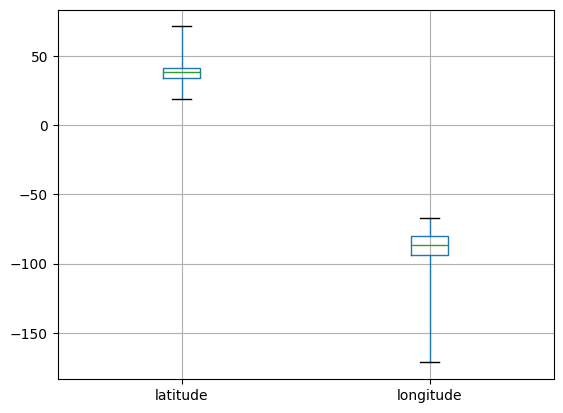

In [119]:
columns_of_interest = ['latitude', 'longitude']

boxplot_func(columns_of_interest=columns_of_interest, data_frame=incidents, whis=6)

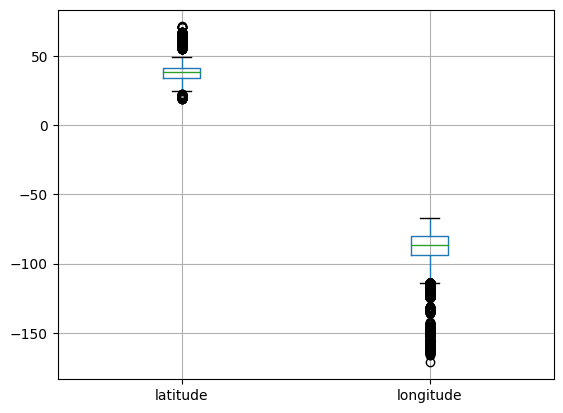

In [120]:
columns_of_interest = ['latitude', 'longitude']

boxplot_func(columns_of_interest=columns_of_interest, data_frame=incidents)

At this point we show how our intuition above is correct by showing a second visual method for searching for outliers. The second method is in fact printing the scatterplot. 

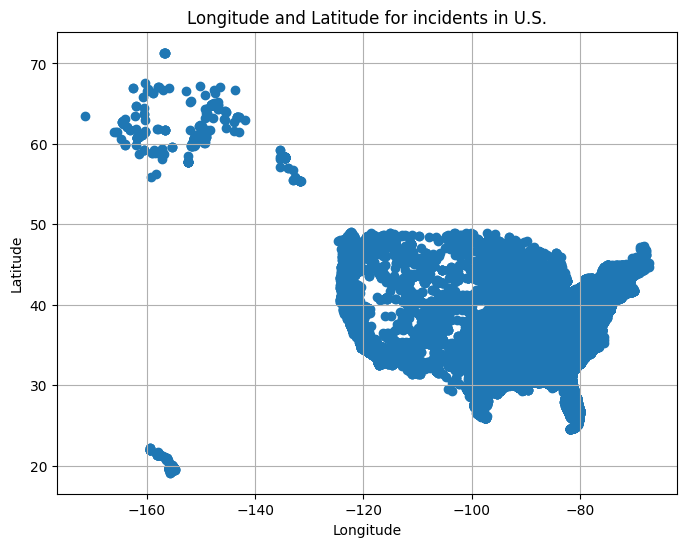

In [121]:
scatterplot_func(dataframe_to_plot=incidents, column_1="longitude", column_2="latitude", figsize=(8,6), xlabel="Longitude",
                 ylabel="Latitude", title="Longitude and Latitude for incidents in U.S.", show_grid=True)

As we can see from the figure above we can actually find three big clusters of data, those in the upper left, those in the lower left, and the big ones in the middle. In fact once we do an analysis of these points with geopy we can see that:
- the points in the lower left fall on Hawaii soil;
- the points in the upper left fall on the soil of Alaska;
- the points in the largest cluster - the middle one - fall on the soil of the remaining 48 federal states.

So we can say again that in these two columns there aren't outliers. 

The last thing we point out is that the rows in which these two columns are null are about 8000, a very small number compared to the size of the incidents dataframe. So again, we can go to delete this rows.

In [122]:
incidents[['latitude', 'longitude']].isnull().sum()

incidents.dropna(subset=["latitude"], inplace=True)
incidents.dropna(subset=["longitude"], inplace=True)

### Poverty - povertyPercentage

Let us now look at the *poverty_percentage* column in the poverty dataframe. The first thing we do is to check how many null data are in this column.

In [123]:
poverty["povertyPercentage"].isna().sum()

52

Since there are very few null data, and since the poverty dataframe possesses only three columns and of these *povertyPercentage* is the most significant, we are going to eliminate the rows in which this column possesses NaN values.

In [124]:
poverty.dropna(subset=["povertyPercentage"], inplace=True)

The last check we need to do is to see that indeed the data within this column are percentage data, that is, numbers between 0 and 100. 

In [125]:
is_percentage_valid = (poverty['povertyPercentage'] >= 0) & (poverty['povertyPercentage'] <= 100)
all_percentages_valid = is_percentage_valid.all()
print(all_percentages_valid)

True


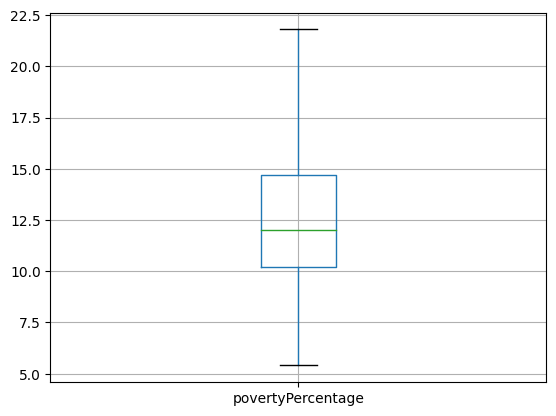

In [126]:
boxplot_func(columns_of_interest=["povertyPercentage"], data_frame=poverty, whis=1.6)

As we can see from the True result of the code above, the povertyPercentage values actually always remain between 0 and 100. We also print the box plot to show that indeed the percentages are all about the same threshold. So we can consider the column clean.

We close this section by printing the histogram to show the distribution of *povertyPercentage*.

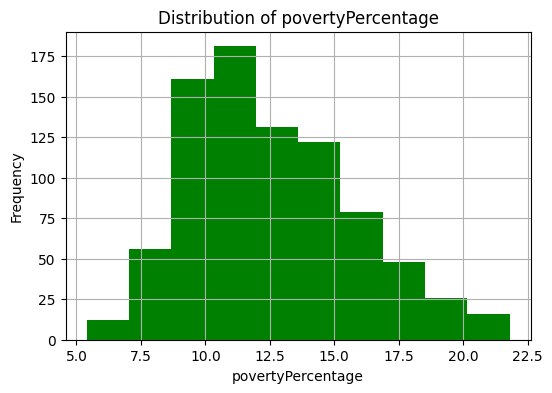

In [127]:
histogram_func(dataframe_to_plot=poverty, columns_to_plot='povertyPercentage', figsize=(6, 4),
               title="Distribution of povertyPercentage", xlabel="povertyPercentage", ylabel="Frequency", 
               show_grid=True, color='green', ylog=False)

### District - party

The first thing we check is that there aren't NaN values in this column.

In [128]:
district["party"].isna().sum()

0

Now, we know that the major American political parties are the Democratic and Republican parties. However, there are minor parties that may have won a few congressional districts over the years, but the idea is that in this specific column we can print the **value_counts()** since we expect to find a few different values there.

In [129]:
district['party'].value_counts()

party
DEMOCRAT                   5513
REPUBLICAN                 4857
DEMOCRATIC-FARMER-LABOR      58
INDEPENDENT                  10
INDEPENDENT-REPUBLICAN        2
FOGLIETTA (DEMOCRAT)          1
Name: count, dtype: int64

We can see from above three things:
- the first 4 occurrences of the **value_counts()** represent 99% of the data, and are actually of parties in the US;
- **INDEPENDENT-REPUBLICAN** is not a party, it is not an obvious typo - it could be either the **INDEPENDENT** or the **REPUBLICAN** party - and it has only two occurrences: so we consider it as outliers;
- **FOGLIETTA (DEMOCRAT)** is a typo, as Foglietta is the name of the candidate of the Democrat party.

We then go on to eliminate the two outliers, i.e., the **INDEPENDENT-REPUBLICAN** parties, and transform the **FOGLIETTA (DEMOCRAT)** party into **DEMOCRAT**.

In [130]:
district['party'].replace("FOGLIETTA (DEMOCRAT)", "DEMOCRAT", inplace=True)

district.drop(district[district['party'] == "INDEPENDENT-REPUBLICAN"].index, inplace=True)

### District - candidatevotes, totalvotes

This first thing we do is to replace values in the *candidatevotes* and *totalvotes* columns with NaN where the original values are less than or equal to 0. In fact a candidate cannot get a negative number of votes or zero votes, and there are no votes with a total number of negative votes. Then we replace also values in the *candidatevotes* column with NaN where the original values are greater than the corresponding values in the *totalvotes* column.

In [131]:
district["candidatevotes"].mask(district['candidatevotes'] <= 0, inplace=True)
district["totalvotes"].mask(district['totalvotes'] <= 0, inplace=True)
district["candidatevotes"].mask(district['candidatevotes'] > district['totalvotes'], inplace=True)

To close the analysis on these columns we decide to look for outliers by printing the box plot.

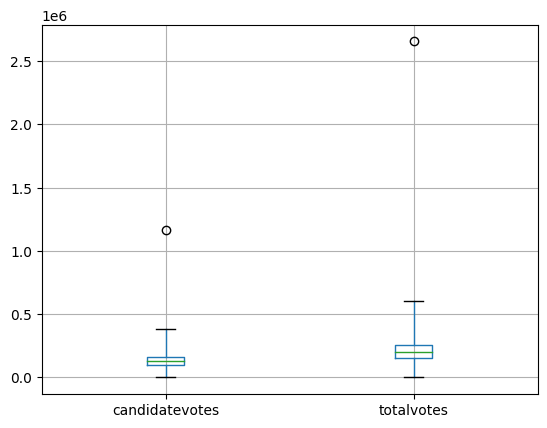

In [132]:
columns_of_interest = ['candidatevotes', 'totalvotes']

boxplot_func(columns_of_interest=columns_of_interest, data_frame=district, whis=3.5)

 Once the box plot is printed we can see that there are actually two outliers - one per column. Let us therefore move on to replace these outliers with NaN.

In [133]:
threshold_value = 1 * 1e6
district["candidatevotes"].mask(district['candidatevotes'] > threshold_value, inplace=True)
district["totalvotes"].mask(district['totalvotes'] > threshold_value, inplace=True)

We will now assess the presence of NaN values in these two columns. Given that there are only three null values in each column, we can proceed to remove the rows containing these null values.

In [134]:
print(district["candidatevotes"].isna().sum())
print(district["totalvotes"].isna().sum())

3
3


In [135]:
district.dropna(subset=['candidatevotes'], inplace=True)
district.dropna(subset=['totalvotes'], inplace=True)

We close by printing the histogram.

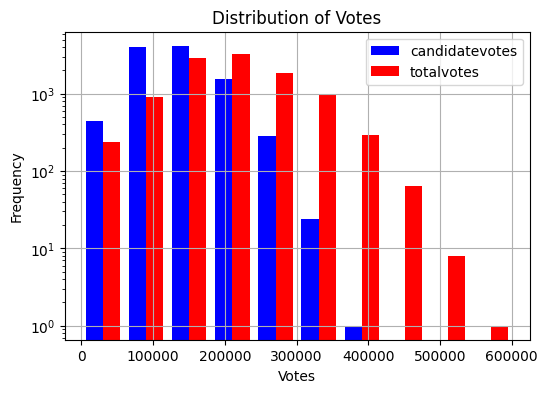

In [136]:
histogram_func2(dataframe_to_plot=district, columns_to_plot=['candidatevotes', 'totalvotes'], 
                figsize=(6, 4), colors=['blue', 'red'], title='Distribution of Votes', xlabel='Votes', 
                ylabel='Frequency', show_grid=True, log=True)

### Overview

In this section we show, with the **info()** command, a final overview of how our dataframes were transformed after the cleaning part.

In [137]:
# Reset the indexes of the dataframes
incidents = incidents.reset_index(drop=True)
poverty = poverty.reset_index(drop=True)
district = district.reset_index(drop=True)

print(incidents.info())
print(poverty.info())
print(district.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179067 entries, 0 to 179066
Data columns (total 23 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   year                       179067 non-null  UInt32 
 1   month                      179067 non-null  int32  
 2   week                       179067 non-null  UInt32 
 3   day                        179067 non-null  int32  
 4   state                      179067 non-null  object 
 5   city_or_county             179067 non-null  object 
 6   latitude                   179067 non-null  float64
 7   longitude                  179067 non-null  float64
 8   congressional_district     179067 non-null  float64
 9   min_age_participants       179067 non-null  float64
 10  avg_age_participants       179067 non-null  float64
 11  max_age_participants       179067 non-null  float64
 12  n_participants_child       179067 non-null  float64
 13  n_participants_teen        17

## Adding Indicators

In this section we deal with adding new columns to the dataset with different information that could be useful during the course of our analysis. We will divide this section into two parts:
- **Internal indicators**: in which we will extract new features from columns in the analyzed dataframes;
- **External indicators**: in which we will extract new columns relevant to our analysis from datasets external to those analyzed so far.

### Internal indicators

The indicators we will add in this section are as follows:
1. *incidents_state_year*
2. *incidents_city_year*
3. *age_range_indicator*
4. *age_combined_index* 
5. *percentage_males*
6. *percentage_adults*
7. *severity_index*
8. *poverty_difference*
9. *poverty_comparison*
10. *percentage_votes*


#### incidents_state_year

In *incidents_state_year* we enter the incident count for each unique combination of *state* and *year* within the incidents dataframe. Basically, we count how many accidents there are for each year in each state.

In [138]:
incidents['incidents_state_year'] = incidents.groupby(['state', 'year'])['state'].transform('count')

#### incidents_city_year

In *incidents_city_year* we do the same as before, but with cities. Basically, we count how many accidents there are for each year in each city.

In [139]:
incidents['incidents_city_year'] = incidents.groupby(['city_or_county', 'state', 'year'])['city_or_county'].transform('count')

#### age_range_indicator

In this index we calculate the difference between *max_age_participants* and *min_age_participants*.

$$
\texttt{age\_range\_indicator}=\texttt{max\_age\_participants}-\texttt{min\_age\_participants}
$$

In [140]:
incidents['age_range_indicator'] = incidents['max_age_participants'] - incidents['min_age_participants']

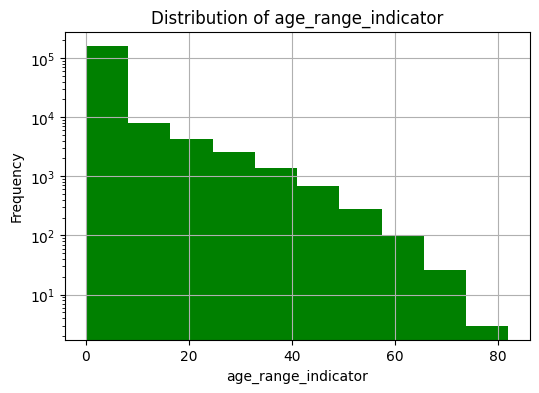

In [141]:
histogram_func(dataframe_to_plot=incidents, columns_to_plot='age_range_indicator', figsize=(6, 4),
               title="Distribution of age_range_indicator", xlabel="age_range_indicator", ylabel="Frequency", 
               show_grid=True, color='green', ylog=True)

#### age_combined_index

This index represents a combination of *max_age_participants*, *min_age_participants* and *avg_age_participants*. The idea is as follows:

1. **Average between maximum and minimum age**: the average between maximum and minimum age is calculated for each incident;
2. **Combination with average age**: this average is then combined with the actual average age, providing an index that takes into account both the variation between the maximum and minimum age and the average age of the participants.

$$
\texttt{age\_combined\_index}=\frac{\frac{\texttt{max\_age\_participants}+\texttt{min\_age\_participants}}{2}+\texttt{avg\_age\_participants}}{2}
$$

In essence, the index aims to provide a value that reflects an overall estimate of age by considering both the dispersion between maximum and minimum age and the average age.

In [142]:
incidents['age_combined_index'] = (((incidents['max_age_participants'] + incidents['min_age_participants']) / 2) + incidents['avg_age_participants']) / 2

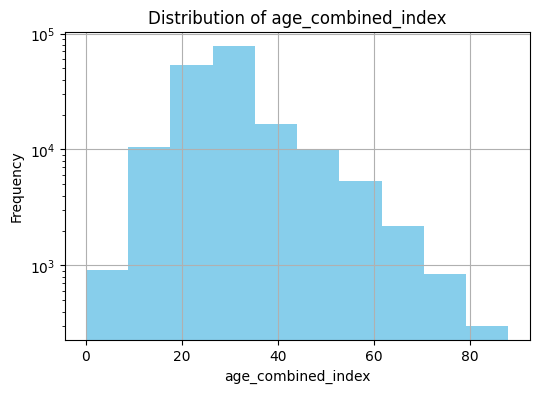

In [143]:
histogram_func(dataframe_to_plot=incidents, columns_to_plot='age_combined_index', figsize=(6, 4),
               title="Distribution of age_combined_index", xlabel="age_combined_index", ylabel="Frequency", 
               show_grid=True, color='skyblue', ylog=True)

#### percentage_males

We now create a new column named *percentage_males* in the incidents dataframe, containing the percentage of *n_males* over *n_participants*. As we saw when analyzing the *n_males* and *n_females* columns, in the incidents in our dataframe about 90% of the participants are males, for this reason we decide to calculate the percentage on the number of men instead on the number of women. 

$$
\texttt{percentage\_males}=\frac{\texttt{n\_males}}{\texttt{n\_participants}}
$$

In [144]:
incidents['percentage_males'] = (incidents['n_males'] / incidents['n_participants']) * 100

#### percentage_adults

We do the same as before, but using *n_participants_adult* column instead of *n_males* column. Again, we decide to work on the number of adults as they represent 91% of occurrences in the incidents in our dataset. We also find it unnecessary to diversify the *n_participants_child* and *n_participants_teen* columns, as the first column represents less than 1.5% of the occurrences in the dataset, and taken together they represent less than 9%. 

$$
\texttt{percentage\_adults}=\frac{\texttt{n\_participants\_adult}}{\texttt{n\_participants}}
$$

In [145]:
incidents['percentage_adults'] = (incidents['n_participants_adult'] / incidents['n_participants']) * 100

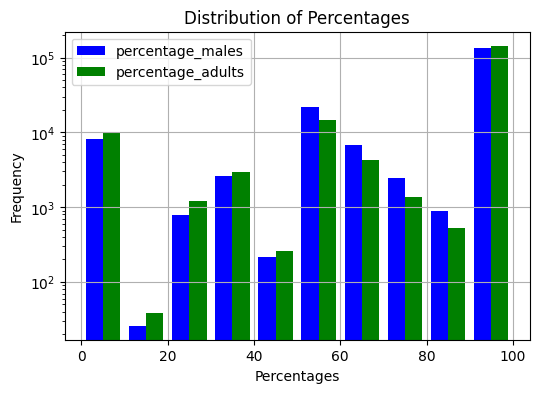

In [146]:
histogram_func2(dataframe_to_plot=incidents, columns_to_plot=['percentage_males', 'percentage_adults'], figsize=(6, 4),
               title="Distribution of Percentages", xlabel="Percentages", ylabel="Frequency", 
               show_grid=True, colors=['blue','green'], ylog=True)

#### severity_index

We now create a new column, called *severity_index*. This is a metric designed to assess the severity of incidents involving firearms. It takes into account the *n_killed* column and the *n_injured* column relative to the total *n_participants*. This index provides a quantitative measure of the overall impact of an incident on the individuals involved.

$$
\texttt{severity\_index}=\frac{\texttt{n\_killed}+\texttt{n\_injured}}{\texttt{n\_participants}}
$$



In [147]:
incidents['severity_index'] = (incidents['n_killed'] + incidents['n_injured']) / incidents['n_participants']

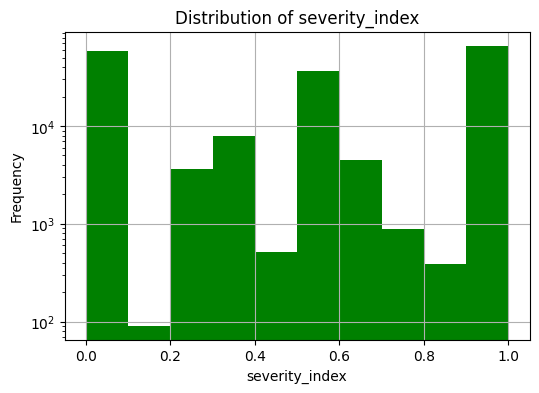

In [148]:
histogram_func(dataframe_to_plot=incidents, columns_to_plot='severity_index', figsize=(6, 4),
               title="Distribution of severity_index", xlabel="severity_index", ylabel="Frequency", 
               show_grid=True, color='green', ylog=True)

#### poverty_difference

The *poverty_difference* column contains the difference between each state's *povertyPercentage* and the United States *povertyPercentage* in the same year. This can be useful in assessing how much a state's economic situation differs from that of the United States in the context of a given year.

In [149]:
poverty['poverty_difference'] = poverty.groupby('year')['povertyPercentage'].transform(lambda x: x - x[poverty['state'] == 'United States'].values[0])

However, in this way this index will also possess negative values, which we do not want for future analysis. To get around this problem we move the values by just enough to get all positive values out. Before we can do this then we print what the minimum is worth in this new column.

In [150]:
poverty['poverty_difference'].min()

-7.800000000000001

Since the minimum is worth about -8, we decide to translate the *poverty_difference* column by 10. Thus in this way we will have all positive values. In addition, the value 10 will represent the exact average poverty in the U.S. All values less than ten will represent those states that are below the average, while those greater than ten are those states that are above the average. 

$$
\texttt{poverty\_difference}=\texttt{poverty\_difference}+10
$$

In [151]:
poverty['poverty_difference'] = poverty['poverty_difference'] + 10

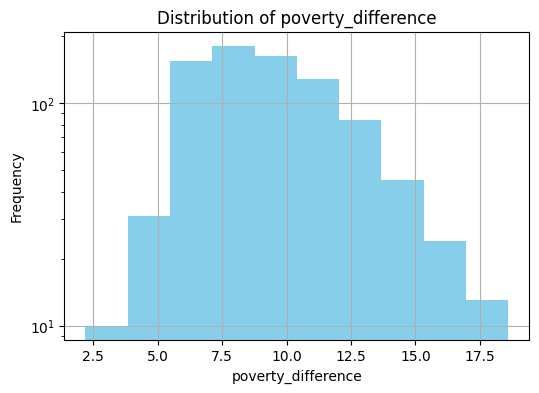

In [152]:
histogram_func(dataframe_to_plot=poverty, columns_to_plot='poverty_difference', figsize=(6, 4),
               title="Distribution of poverty_difference", xlabel="poverty_difference", ylabel="Frequency", 
               show_grid=True, color='skyblue', ylog=True)

#### poverty_comparison

The *poverty_comparison* column is a categorization based on the difference between a state's poverty rate and that of the United States. It indicates whether a state's poverty situation is above or below the national average.

In [153]:
poverty['poverty_comparison'] = pd.cut(poverty['poverty_difference'], bins=[float('-inf'), 10, float('inf')], labels=['Below US Average', 'Above US Average'])

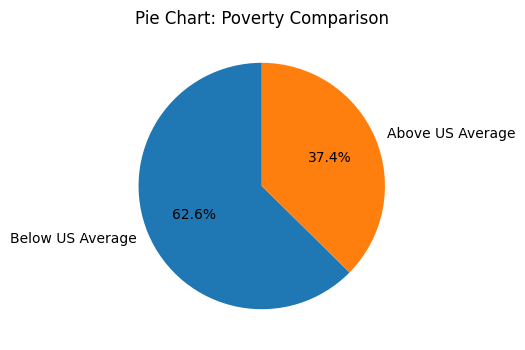

In [154]:
value_counts_to_plot=poverty["poverty_comparison"].value_counts()
pieplot_func(value_counts_to_plot=value_counts_to_plot, labels=value_counts_to_plot.index, figsize=(4,4),
             title="Pie Chart: Poverty Comparison")

#### percentage_votes

In the *percentage_votes* column, we calculate the percentage of votes obtained by the winning party candidate by dividing the *candidatevotes* by the *totalvotes* in the district and multiplying the result by 100.

In [155]:
district['percentage_votes'] = (district['candidatevotes'] / district['totalvotes']) * 100

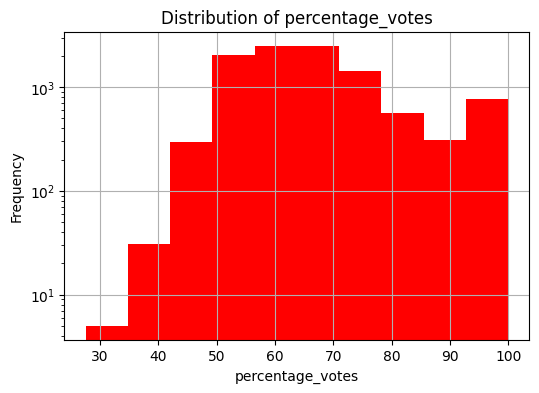

In [156]:
histogram_func(dataframe_to_plot=district, columns_to_plot='percentage_votes', figsize=(6, 4),
               title="Distribution of percentage_votes", xlabel="percentage_votes", ylabel="Frequency", 
               show_grid=True, color='red', ylog=True)

#### Eliminating Columns No Longer Relevant

To close the section, we move on to delete columns on which we have extracted information and therefore no longer consider useful for our future analysis. Note that we sometimes transform information in multiple columns into a single piece of data to avoid having different columns that present the same types of information, and are therefore highly correlated. We so drop these columns:

- **Incidents dataframe** 
    1. *min_age_participants*
    2. *avg_age_participants*
    3. *max_age_participants*
    4. *n_males*
    5. *n_females*
    6. *n_participants_child*
    7. *n_participants_teen*
    8. *n_participants_adult*

- **District dataframe**
    1. *candidatevotes*
    2. *totalvotes*

In [157]:
incidents = incidents.drop(columns=['min_age_participants'])
incidents = incidents.drop(columns=['avg_age_participants'])
incidents = incidents.drop(columns=['max_age_participants'])
incidents = incidents.drop(columns=['n_males'])
incidents = incidents.drop(columns=['n_females'])
incidents = incidents.drop(columns=['n_participants_child'])
incidents = incidents.drop(columns=['n_participants_teen'])
incidents = incidents.drop(columns=['n_participants_adult'])
district = district.drop(columns=['candidatevotes'])
district = district.drop(columns=['totalvotes'])

#### Reorganizing Incidents Columns

To close this section, we resort the columns in the dataframe taking into account the newly added ones, so that we have a neater view when printing the data. We will organize the information in the columns in this way:
1. **Information regarding the date**: from *year* to *day*;
2. **Information regarding location**: from *state* to *incidents_city_year*;
3. **Information regarding incident**: from *severity_index* to *incident_characteristic1*.

In [158]:
resorted_columns=["year", "month", "week", "day", "state", "congressional_district", "city_or_county",
                  "latitude", "longitude", "incidents_state_year", "incidents_city_year", "severity_index", 
                  "n_participants", "n_killed", "n_injured", "n_unharmed", "n_arrested", "percentage_males",
                   "percentage_adults", "age_range_indicator", "age_combined_index", "incident_characteristics1"]

incidents=incidents[resorted_columns]

In [159]:
incidents.head()

,year,month,week,day,state,congressional_district,city_or_county,latitude,longitude,incidents_state_year,incidents_city_year,severity_index,n_participants,n_killed,n_injured,n_unharmed,n_arrested,percentage_males,percentage_adults,age_range_indicator,age_combined_index,incident_characteristics1
0,2015,5,18,2,Indiana,7.0,Indianapolis,39.8322,-86.2492,719,211,1.0,1.0,0.0,1.0,0.0,0.0,100.0,100.0,0.0,19.000000,Shot - Wounded/Injured
1,2017,4,14,3,Pennsylvania,5.0,Kane,41.6645,-78.7856,1739,2,1.0,1.0,1.0,0.0,0.0,0.0,100.0,100.0,0.0,62.000000,"Shot - Dead (murder, accidental, suicide)"
2,2016,10,41,15,District of Columbia,1.0,Washington,38.9030,-76.9820,261,260,0.5,2.0,0.0,1.0,0.0,0.0,50.0,50.0,4.0,29.982022,Shot - Wounded/Injured
3,2030,6,24,14,Pennsylvania,14.0,Pittsburgh,40.4621,-80.0308,288,45,0.5,2.0,0.0,1.0,1.0,0.0,50.0,50.0,4.0,29.982022,Shot - Wounded/Injured
4,2014,1,3,18,North Carolina,13.0,Wayne County,35.1847,-77.9527,1103,3,1.0,1.0,0.0,1.0,0.0,0.0,100.0,100.0,0.0,65.000000,Shot - Wounded/Injured


### External datasets

At this point we move on to combining information taken from two external datasets. This information will be incomplete with respect to some of the characteristics in our dataframe - such as whether it varies with respect to days, months, or years - and so we will combine it into a different dataframe, that contains a copy of our dataframe. This new dataframe will then be used for certain future analyses in which we will also use these columns taken from the external datasets.   

#### Dataframe: cities_population

The first fundamental information that can be combined with our dataset was the number of inhabitants per city. We examined various datasets, and in the end we found a dataset that in our opinion represented the best choice - both in terms of reliability and the number of cities presented. This dataset uses information from the U.S. Geological Survey and the U.S. Census Bureau and is updated on January 1, 2023. We tried to find a dataset that expressed the population for each city in relation to the year, but we made the following considerations:
- most of the datasets with a lot of information were obscured or paid for, and we had no possibility of using them;
- among the datasets made available, those with the population of the cities that varies with the year, only had information from a few cities - around a thousand - compared to the much higher number in our dataset;
- the population of a city can vary over the years, but since we analyze a small number of years, the change is almost imperceptible. A city that is considered large - for example New York or Los Angeles - remains large, and a small town remains small.

In light of these considerations, using a dataset with information updated to 2023 did not seem like a big problem to us, as the data on the population obtained represents - especially in relation to the analyzes in which we will use it - statistically reliable data even for past years .

In [160]:
path_to_extra = "/datasets_extra"
cities_population=pd.read_csv(f'{path_to_datasets}{path_to_extra}/uscities.csv')
cities_population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30844 entries, 0 to 30843
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   city          30844 non-null  object 
 1   city_ascii    30844 non-null  object 
 2   state_id      30844 non-null  object 
 3   state_name    30844 non-null  object 
 4   county_fips   30844 non-null  int64  
 5   county_name   30844 non-null  object 
 6   lat           30844 non-null  float64
 7   lng           30844 non-null  float64
 8   population    30844 non-null  int64  
 9   density       30844 non-null  float64
 10  source        30844 non-null  object 
 11  military      30844 non-null  bool   
 12  incorporated  30844 non-null  bool   
 13  timezone      30844 non-null  object 
 14  ranking       30844 non-null  int64  
 15  zips          30842 non-null  object 
 16  id            30844 non-null  int64  
dtypes: bool(2), float64(3), int64(4), object(8)
memory usage: 3.6+ MB


At this point, after having loaded the new dataset which we called **cities_population**, we proceeded to discard the columns that we did not consider interesting, and kept those that we considered useful instead. We then renamed the two columns that we would use as a discriminant to join this information to the incidents dataframe, i.e. *state* and *city_or_county*. In the end our new dataframe has the following 3 columns:
- *city_or_county*: the name of the city;
- *state*: the name of the state to which the city belongs;
- *population*: the number of the city's population.

In [161]:
columns_to_keep=["city", "state_name", "population"]
cities_population=cities_population[columns_to_keep]

cities_population.rename(columns={'city': 'city_or_county'}, inplace=True)
cities_population.rename(columns={'state_name': 'state'}, inplace=True)

At this point we proceeded to eliminate all the lines in which the population data was 0 as these lines did not provide us with truly useful information. Furthermore, to be safe, we have eliminated duplicates, in case there were any. At this point we used the **merge()** command to add the new columns *population* to the new dataframe. We used the *how=left* command to mean that we wanted to use only the occurrences of cities present in our reference dataframe, i.e. incidents.

In [162]:
cities_population=cities_population[cities_population["population"]!=0]
cities_population=cities_population.drop_duplicates()

In [163]:
external_incidents=incidents.copy()
external_incidents=pd.merge(external_incidents, cities_population, on=['city_or_county', 'state'], how='left')

Finally we print how many occurrences of these new two columns are null. In particular we see that approximately 21 thousand rows are null, a fairly small number compared to the approximately 180 thousand rows of the external_incidents dataframe. These null lines are due to the fact that in the *city_or_county* column of external_incidents there are not always the name of a city, but sometimes also the name of a county, which makes it difficult to truly understand the population. However, we considered the number of null data acceptable, especially considering how many null values we would have had using other datasets - around 100 thousand null rows.

In [164]:
external_incidents["population"].isnull().sum()

21491

So for this external dataframe we are going to delete the rows where these the population column has null data.

In [165]:
external_incidents.dropna(subset=['population'], inplace=True)

#### Dataframe: info_cities

At this point we instead use a new dataset to obtain other types of information. This dataset actually represented also the population of cities, but unfortunately it only presents data for cities with a population greater than 65 thousand inhabitants. We can therefore say that the information we will add using this dataset is inherent only to medium/large cities. This dataset also uses information from the U.S. Geological Survey and the U.S. Census Bureau and is updated to 2023. The considerations on why we considered this dataset reliable despite having information for a single year are the same as above. So we will not use all the columns of this downloaded dataset, but only some. Let's start by downloading the dataset, which we call *info_cities*, and display it.

In [166]:
info_cities = pd.read_csv(f'{path_to_datasets}{path_to_extra}/us-cities-demographics.csv', sep=";")
info_cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   City                    2891 non-null   object 
 1   State                   2891 non-null   object 
 2   Median Age              2891 non-null   float64
 3   Male Population         2888 non-null   float64
 4   Female Population       2888 non-null   float64
 5   Total Population        2891 non-null   int64  
 6   Number of Veterans      2878 non-null   float64
 7   Foreign-born            2878 non-null   float64
 8   Average Household Size  2875 non-null   float64
 9   State Code              2891 non-null   object 
 10  Race                    2891 non-null   object 
 11  Count                   2891 non-null   int64  
dtypes: float64(6), int64(2), object(4)
memory usage: 271.2+ KB


We then proceed to eliminate the columns that do not interest us and rename the columns with the information relating to the states and cities, in order to facilitate the subsequent task of adding the new columns to our dataframe using these two as discriminants. In the end we will then have the following new columns to add to our incidents dataframe:
- *Median Age*: in this column we have the number of the average age of the inhabitants of each city;
- *Number of Veterans*: in this column we have the number of veterans present in each city;
- *Foreign-born*: in this column we have the number of non-citizen inhabitants of the United States present in each city;
- *Average Household Size*: in this column we have the number indicating the average size of families for each city.

In [167]:
columns_to_keep=["City", "State", "Median Age", "Number of Veterans", "Foreign-born", "Average Household Size"]
info_cities=info_cities[columns_to_keep]

info_cities.rename(columns={'City': 'city_or_county'}, inplace=True)
info_cities.rename(columns={'State': 'state'}, inplace=True)

Let's now count how many null rows there are for each column in this dataframe. Let's see how they are very few, which makes the data acceptable.

In [168]:
info_cities.isnull().sum()

city_or_county             0
state                      0
Median Age                 0
Number of Veterans        13
Foreign-born              13
Average Household Size    16
dtype: int64

We then go on to fill in these null data with their median.

In [169]:
fill_median(info_cities, 'Number of Veterans')
fill_median(info_cities, 'Foreign-born')
fill_median(info_cities, 'Average Household Size')

We then move on to join these new columns to the incidents dataframe using exactly the same commands as above. We then print the number of rows in which the values are zero, and we see that they are around 55 thousand. This depends on the fact that these cities have a low number of inhabitants, or that in the incidents dataset the name of the city is not reported but that of the county. However, we consider these numbers acceptable, because we will use these data to make inference only on large cities.

In [170]:
info_cities=info_cities.drop_duplicates()
external_incidents=pd.merge(external_incidents, info_cities, on=['city_or_county', 'state'], how='left')

In [171]:
external_incidents[["Median Age", "Number of Veterans", "Foreign-born", "Average Household Size"]].isnull().sum()

Median Age                55663
Number of Veterans        55663
Foreign-born              55663
Average Household Size    55663
dtype: int64

We continue to delete this row in this new dataframe, even though doing so eliminates a good portion of our dataframe. The reason we do this is because we will be using external_incidents at some points in the clustering to do additional analysis beyond that on our dataframe. Remember also that we are not modifying our original incident dataframe, but an external dataframe called **external_incidents**.

In [172]:
external_incidents.dropna(subset=['Median Age'], inplace=True)
external_incidents.dropna(subset=['Number of Veterans'], inplace=True)
external_incidents.dropna(subset=['Foreign-born'], inplace=True)
external_incidents.dropna(subset=['Average Household Size'], inplace=True)

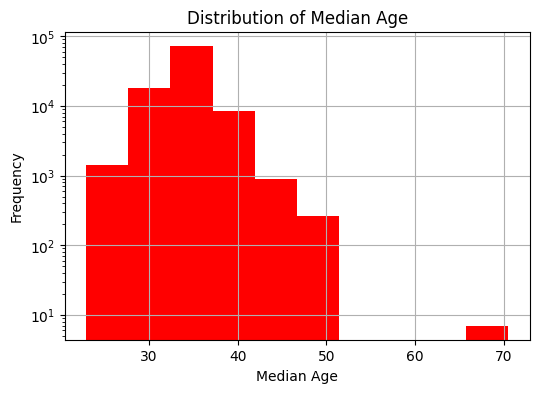

In [173]:
histogram_func(dataframe_to_plot=external_incidents, columns_to_plot='Median Age', figsize=(6, 4),
               title="Distribution of Median Age", xlabel="Median Age", ylabel="Frequency", 
               show_grid=True, color='red', ylog=True)

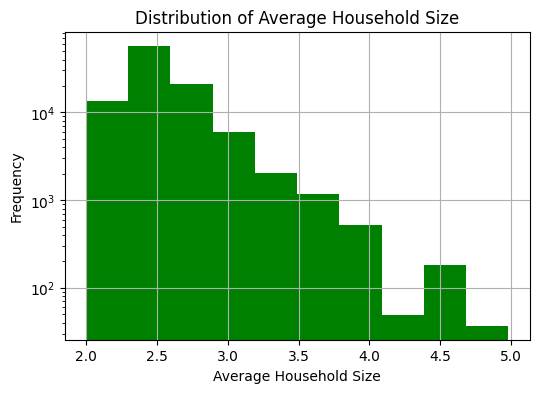

In [174]:
histogram_func(dataframe_to_plot=external_incidents, columns_to_plot='Average Household Size', figsize=(6, 4),
               title="Distribution of Average Household Size", xlabel="Average Household Size", ylabel="Frequency", 
               show_grid=True, color='green', ylog=True)

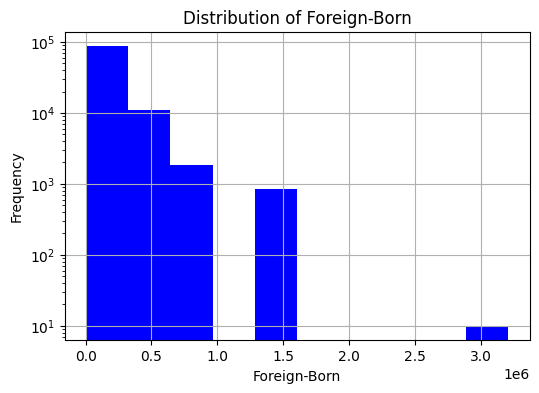

In [175]:
histogram_func(dataframe_to_plot=external_incidents, columns_to_plot='Foreign-born', figsize=(6, 4),
               title="Distribution of Foreign-Born", xlabel="Foreign-Born", ylabel="Frequency", 
               show_grid=True, color='blue', ylog=True)

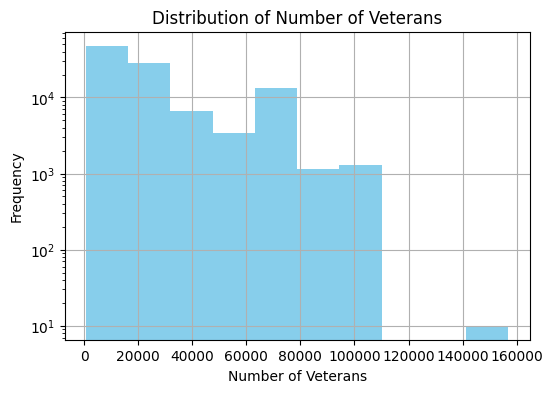

In [176]:
histogram_func(dataframe_to_plot=external_incidents, columns_to_plot='Number of Veterans', figsize=(6, 4),
               title="Distribution of Number of Veterans", xlabel="Number of Veterans", ylabel="Frequency", 
               show_grid=True, color='skyblue', ylog=True)

#### welfare_index

We close this section by defining a new index for external_incidents. This index should calculate the welfare of a city using the newly defined indexes. We will then use a weighted sum of *Median Age*, *Number of Veterans*, *Foreign-born* and *Average Household Size* to calculate this index. Specifically:
$$
\texttt{welfare\_index}= \frac{\omega_1 \cdot \texttt{Median Age}+\omega_2 \cdot \texttt{Number of Veterans}+\omega_3 \cdot \texttt{Foreign-born}+\omega_4 \cdot \texttt{Average Household Size}}{4}
$$
where we set $\omega_1 =0.4$, $\omega_2=0.1$, $\omega_3=0.2$ and $\omega_4=0.3$ and such that $\sum_i \omega_i = 1$.

In [177]:
weight_median_age = 0.4
weight_veterans = 0.2
weight_foreign_born = 0.2
weight_avg_household_size = 0.2

external_incidents['welfare_index'] = (
    (weight_median_age * external_incidents['Median Age']) +
    (weight_veterans * external_incidents['Number of Veterans']) +
    (weight_foreign_born * external_incidents['Foreign-born']) +
    (weight_avg_household_size * external_incidents['Average Household Size'])
) / 4


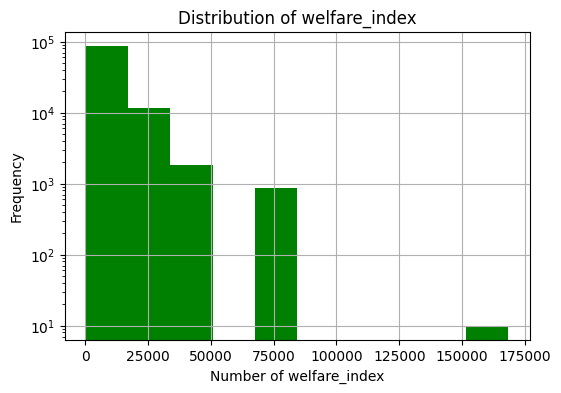

In [178]:
histogram_func(dataframe_to_plot=external_incidents, columns_to_plot='welfare_index', figsize=(6, 4),
               title="Distribution of welfare_index", xlabel="Number of welfare_index", ylabel="Frequency", 
               show_grid=True, color='green', ylog=True)

#### Reorganizing External_Incidents Columns

As we have done before, to close this section we resort the columns in the dataframe taking into account the newly added ones, so that we have a neater view when printing the data. We will organize the information in the columns in this way:
1. **Information regarding the date**: from *year* to *day*;
2. **Information regarding location**: from *state* to *incidents_city_year*;
3. **Information regarding incident**: from *severity_index* to *incident_characteristic1*.

In [179]:
resorted_columns=["year", "month", "week", "day", "state", "congressional_district", "city_or_county", "welfare_index",
                  "population", "Median Age", "Number of Veterans", "Foreign-born", "Average Household Size", "latitude", 
                  "longitude", "incidents_state_year", "incidents_city_year", "severity_index", 
                  "n_participants", "n_killed", "n_injured", "n_unharmed", "n_arrested", "percentage_males",
                   "percentage_adults", "age_range_indicator", "age_combined_index", "incident_characteristics1"]

external_incidents=external_incidents[resorted_columns]

In [180]:
external_incidents.head()

,year,month,week,day,state,congressional_district,city_or_county,welfare_index,population,Median Age,Number of Veterans,Foreign-born,Average Household Size,latitude,longitude,incidents_state_year,incidents_city_year,severity_index,n_participants,n_killed,n_injured,n_unharmed,n_arrested,percentage_males,percentage_adults,age_range_indicator,age_combined_index,incident_characteristics1
0,2015,5,18,2,Indiana,7.0,Indianapolis,5735.6365,1659305.0,34.1,42186.0,72456.0,2.53,39.8322,-86.2492,719,211,1.0,1.0,0.0,1.0,0.0,0.0,100.0,100.0,0.0,19.000000,Shot - Wounded/Injured
2,2016,10,41,15,District of Columbia,1.0,Washington,6057.4920,4810669.0,33.8,25963.0,95117.0,2.24,38.9030,-76.9820,261,260,0.5,2.0,0.0,1.0,0.0,0.0,50.0,50.0,4.0,29.982022,Shot - Wounded/Injured
3,2030,6,24,14,Pennsylvania,14.0,Pittsburgh,2299.1465,1720279.0,32.9,17728.0,28187.0,2.13,40.4621,-80.0308,288,45,0.5,2.0,0.0,1.0,1.0,0.0,50.0,50.0,4.0,29.982022,Shot - Wounded/Injured
5,2016,3,11,16,Connecticut,3.0,New Haven,1425.0140,587648.0,29.9,2567.0,25871.0,2.48,41.2945,-72.9457,585,78,0.0,1.0,0.0,0.0,0.0,1.0,100.0,0.0,4.0,29.982022,Institution/Group/Business
6,2015,3,12,22,Oklahoma,1.0,Tulsa,3424.7685,715983.0,35.0,24672.0,43751.0,2.37,36.1060,-96.0764,436,150,1.0,1.0,0.0,1.0,0.0,0.0,0.0,100.0,0.0,20.000000,Shot - Wounded/Injured


# Join the Dataframes

After studying the general characteristics of the three datasets, we can move on to join them using the column in common, to obtain one large table containing all the information from the three dataframes.

## Original Dataframes

We initially create a new dataframe, which we call **join_dataset**, from the original dataframe - the ones we will use most throughout the analysis. We note that when we merge according to the columns in common, we always use the columns of the incidents dataframe as discriminants. 

In [181]:
join_1 = pd.merge(incidents, poverty, on=['year','state'], how='left')

# Workaround to join district table
temp = join_1['state']
join_1['state'] = join_1['state'].str.upper()
join_dataframe = pd.merge(join_1, district, on=['year','state','congressional_district'], how='left')
join_dataframe['state'] = temp

join_dataframe.tail()

,year,month,week,day,state,congressional_district,city_or_county,latitude,longitude,incidents_state_year,incidents_city_year,severity_index,n_participants,n_killed,n_injured,n_unharmed,n_arrested,percentage_males,percentage_adults,age_range_indicator,age_combined_index,incident_characteristics1,povertyPercentage,poverty_difference,poverty_comparison,party,percentage_votes
179062,2016,1,2,11,Tennessee,4.0,Murfreesboro,35.8624,-86.3695,1380,36,1.0,1.0,0.0,1.0,0.0,0.0,100.000000,100.000000,4.0,29.982022,Shot - Wounded/Injured,12.6,10.3,Above US Average,REPUBLICAN,65.034106
179063,2029,1,1,1,New York,20.0,Troy,42.7043,-73.6590,352,6,0.0,3.0,0.0,0.0,3.0,0.0,66.666667,66.666667,4.0,29.982022,Armed robbery with injury/death and/or evidenc...,NaN,NaN,NaN,NaN,NaN
179064,2017,8,33,17,Tennessee,9.0,Memphis,35.1007,-89.9700,1419,456,1.0,1.0,0.0,1.0,0.0,0.0,100.000000,100.000000,0.0,58.000000,Shot - Wounded/Injured,12.1,10.6,Above US Average,NaN,NaN
179065,2016,6,23,7,Colorado,5.0,Colorado Springs,38.8251,-104.8020,433,103,0.0,2.0,0.0,0.0,1.0,1.0,100.000000,50.000000,0.0,68.000000,Non-Shooting Incident,8.9,6.6,Below US Average,REPUBLICAN,62.278829
179066,2016,6,23,12,Pennsylvania,1.0,Chester,39.8469,-75.3679,1745,22,1.0,1.0,0.0,1.0,0.0,0.0,0.000000,100.000000,4.0,29.982022,Shot - Wounded/Injured,11.5,9.2,Below US Average,DEMOCRAT,82.201599


Once we have merged the three tables we will have many new null data - due to lack of information. Let's count them using the **.isnull().sum()** command.

In [182]:
null_counts = join_dataframe.isnull().sum()
print(null_counts)

year                              0
month                             0
week                              0
day                               0
state                             0
congressional_district            0
city_or_county                    0
latitude                          0
longitude                         0
incidents_state_year              0
incidents_city_year               0
severity_index                    0
n_participants                    0
n_killed                          0
n_injured                         0
n_unharmed                        0
n_arrested                        0
percentage_males                  0
percentage_adults                 0
age_range_indicator               0
age_combined_index                0
incident_characteristics1         0
povertyPercentage             22249
poverty_difference            22249
poverty_comparison            22249
party                        101526
percentage_votes             101526
dtype: int64


Finally we replace all NaNs in two numeric columns, *povertyPercentage* and *poverty_difference*, with the median of the same columns. We do this to avoid having too many null values, but at the same time not affecting statistics about the distribution of values in the columns we are working on. 

In [183]:
fill_median(data_frame=join_dataframe, column_to_fill="povertyPercentage")
fill_median(data_frame=join_dataframe, column_to_fill="poverty_difference")

We note that we do not fill the *percentage_votes* column because it has too many null values, which result from the fact that the votes are there only in even-numbered years. We will decide during the course of future analysis how to treat these rows.

## External Dataframes

We do the same process with the external_incidents dataframe and we create a new **join_external_dataframe**.

In [184]:
join_1 = pd.merge(external_incidents, poverty, on=['year','state'], how='left')

# Workaround to join district table
temp = join_1['state']
join_1['state'] = join_1['state'].str.upper()
join_external_dataframe = pd.merge(join_1, district, on=['year','state','congressional_district'], how='left')
join_external_dataframe['state'] = temp

join_external_dataframe.tail()

,year,month,week,day,state,congressional_district,city_or_county,welfare_index,population,Median Age,Number of Veterans,Foreign-born,Average Household Size,latitude,longitude,incidents_state_year,incidents_city_year,severity_index,n_participants,n_killed,n_injured,n_unharmed,n_arrested,percentage_males,percentage_adults,age_range_indicator,age_combined_index,incident_characteristics1,povertyPercentage,poverty_difference,poverty_comparison,party,percentage_votes
101949,2016,3,11,16,Washington,2.0,Everett,1372.7680,110438.0,37.0,7880.0,19499.0,2.36,47.9790,-122.2020,581,21,0.0,1.0,0.0,0.0,0.0,1.0,100.0,100.0,0.0,25.000000,Non-Shooting Incident,10.3,8.0,Below US Average,DEMOCRAT,64.016250
101950,2015,10,44,31,New Jersey,12.0,Trenton,1155.0820,316436.0,33.3,2604.0,20428.0,3.04,40.2024,-74.7585,817,118,1.0,2.0,0.0,2.0,0.0,0.0,50.0,100.0,6.0,27.000000,Shot - Wounded/Injured,9.7,6.9,Below US Average,NaN,NaN
101951,2016,1,2,11,Tennessee,4.0,Murfreesboro,710.5000,181450.0,30.2,5199.0,8948.0,2.60,35.8624,-86.3695,1380,36,1.0,1.0,0.0,1.0,0.0,0.0,100.0,100.0,4.0,29.982022,Shot - Wounded/Injured,12.6,10.3,Above US Average,REPUBLICAN,65.034106
101952,2017,8,33,17,Tennessee,9.0,Memphis,3728.8875,1034498.0,34.1,31189.0,43318.0,2.55,35.1007,-89.9700,1419,456,1.0,1.0,0.0,1.0,0.0,0.0,100.0,100.0,0.0,58.000000,Shot - Wounded/Injured,12.1,10.6,Above US Average,NaN,NaN
101953,2016,6,23,7,Colorado,5.0,Colorado Springs,4234.1540,628808.0,34.8,49291.0,35320.0,2.48,38.8251,-104.8020,433,103,0.0,2.0,0.0,0.0,1.0,1.0,100.0,50.0,0.0,68.000000,Non-Shooting Incident,8.9,6.6,Below US Average,REPUBLICAN,62.278829


Again, let's count the new creates null values using the **.isnull().sum()** command, and fill the null values in the numerical columns with the median.

In [185]:
join_external_dataframe.isna().sum()

year                             0
month                            0
week                             0
day                              0
state                            0
congressional_district           0
city_or_county                   0
welfare_index                    0
population                       0
Median Age                       0
Number of Veterans               0
Foreign-born                     0
Average Household Size           0
latitude                         0
longitude                        0
incidents_state_year             0
incidents_city_year              0
severity_index                   0
n_participants                   0
n_killed                         0
n_injured                        0
n_unharmed                       0
n_arrested                       0
percentage_males                 0
percentage_adults                0
age_range_indicator              0
age_combined_index               0
incident_characteristics1        0
povertyPercentage   

In [186]:
fill_median(data_frame=join_external_dataframe, column_to_fill="povertyPercentage")
fill_median(data_frame=join_external_dataframe, column_to_fill="poverty_difference")

# Correlation

In this last section we are concerned with making correlation between data and evaluating the results obtained. As a first step we select all numeric rows, as we cannot make correlation with columns that contain strings.

In [187]:
# Selects the desired columns excluding those specified
columns_to_keep = [col for col in join_dataframe.columns 
                   if col not in ['state', 'city_or_county', 'incident_characteristics1', 'poverty_comparison', 'party']]

dataframe_without_string = join_dataframe[columns_to_keep].copy()

We can now move on print the table with the correlation between all the data to give us a general idea, using the **.corr** command.

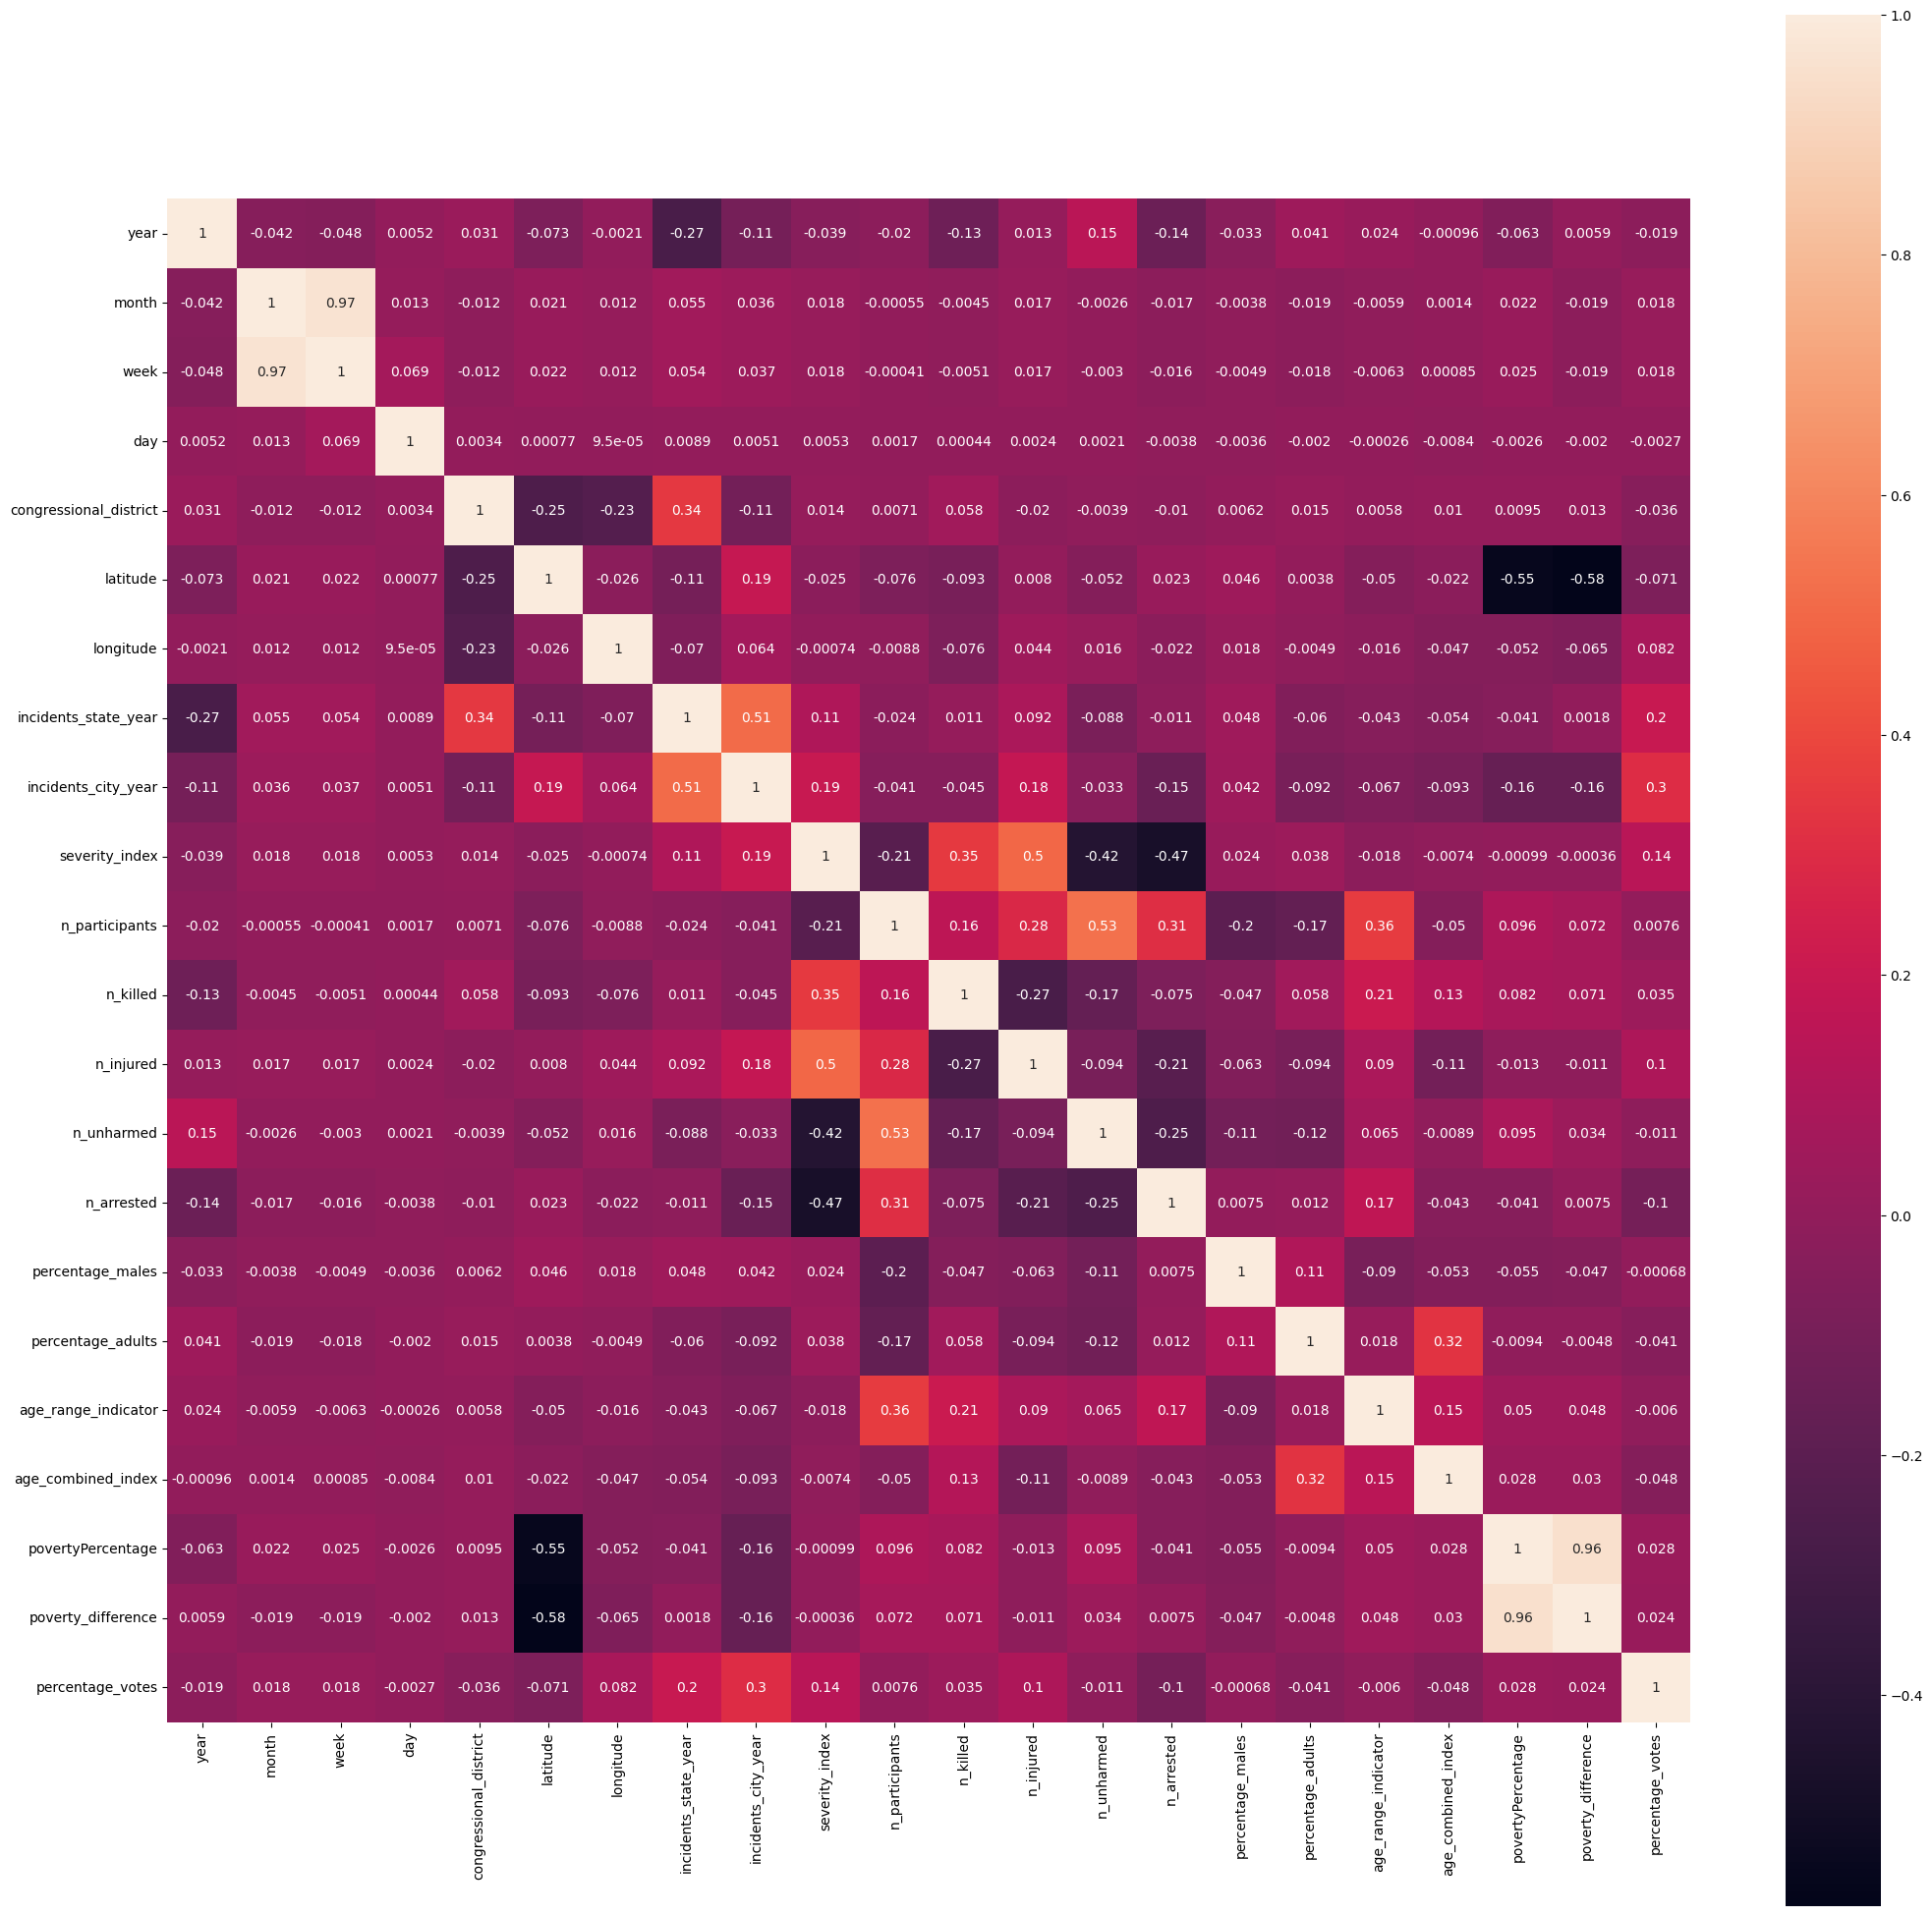

In [188]:
corr_matrix = dataframe_without_string.corr()

#sample figsize in inches
fig, ax = plt.subplots(figsize=(25,25))         
mask = np.zeros_like(corr_matrix)

#draw the heatmap with the mask
sns.heatmap(corr_matrix, annot=True, mask=mask, square=True)

plt.show()

As we can see, having a large number of columns makes it difficult to extract useful information from such a large table. For this reason we use two new functions defined in **Utility Function** section:  

- **get_redundant_pairs**: in this function we transform the correlation matrix into an upper triangular matrix. In fact, the corelation matrix as constructed is symmetric, so it makes sense to eliminate all the equal pairs already analyzed in the top part of the matrix.

- **get_top_abs_correlation**: in this function we instead find and return the *n* pairs with the highest correlation in absolute value,thus considering both positive correlation - when data rise or fall together - and negative correlation - when data in one column goes up the others go down.

In [189]:
print("Top Absolute Correlations")
corr_df = dataframe_without_string[dataframe_without_string.columns.difference(['day', 'week', 'poverty_difference'])]
print("-------------------")
print(get_top_abs_correlations(data_frame=corr_df, n=20))
print("-------------------")

Top Absolute Correlations
-------------------
latitude                povertyPercentage       0.549489
n_participants          n_unharmed              0.526269
incidents_city_year     incidents_state_year    0.512092
n_injured               severity_index          0.499441
n_arrested              severity_index          0.473554
n_unharmed              severity_index          0.421901
age_range_indicator     n_participants          0.356501
n_killed                severity_index          0.353391
congressional_district  incidents_state_year    0.343001
age_combined_index      percentage_adults       0.324891
n_arrested              n_participants          0.306499
incidents_city_year     percentage_votes        0.303909
n_injured               n_participants          0.280057
incidents_state_year    year                    0.271905
n_injured               n_killed                0.268854
congressional_district  latitude                0.250515
n_arrested              n_unharmed        

# Storing the datasets in csv files

In order to make use of the dataset created within the other steps of this analysis, we extract it in the form of a csv file. We create two files, one for the join_dataframe and another for the join_external_dataframe.

In [190]:
# Get the directory of the script
script_directory = os.getcwd()

# Specify the folder name
folder_name = '../datasets/datasets_cleaned'

# Combine the script directory and folder name to get the full path
folder_path = os.path.join(script_directory, folder_name)

# Check if the folder exists, and create it if not
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

join_dataframe.to_csv(path_or_buf=f'{folder_name}/join_dataframe.csv', index=False)
join_external_dataframe.to_csv(path_or_buf=f'{folder_name}/join_external_dataframe.csv', index=False)

In [191]:
join_dataframe.head()

,year,month,week,day,state,congressional_district,city_or_county,latitude,longitude,incidents_state_year,incidents_city_year,severity_index,n_participants,n_killed,n_injured,n_unharmed,n_arrested,percentage_males,percentage_adults,age_range_indicator,age_combined_index,incident_characteristics1,povertyPercentage,poverty_difference,poverty_comparison,party,percentage_votes
0,2015,5,18,2,Indiana,7.0,Indianapolis,39.8322,-86.2492,719,211,1.0,1.0,0.0,1.0,0.0,0.0,100.0,100.0,0.0,19.000000,Shot - Wounded/Injured,12.300000,9.500000,Below US Average,NaN,NaN
1,2017,4,14,3,Pennsylvania,5.0,Kane,41.6645,-78.7856,1739,2,1.0,1.0,1.0,0.0,0.0,0.0,100.0,100.0,0.0,62.000000,"Shot - Dead (murder, accidental, suicide)",10.500000,9.000000,Below US Average,NaN,NaN
2,2016,10,41,15,District of Columbia,1.0,Washington,38.9030,-76.9820,261,260,0.5,2.0,0.0,1.0,0.0,0.0,50.0,50.0,4.0,29.982022,Shot - Wounded/Injured,14.900000,12.600000,Above US Average,NaN,NaN
3,2030,6,24,14,Pennsylvania,14.0,Pittsburgh,40.4621,-80.0308,288,45,0.5,2.0,0.0,1.0,1.0,0.0,50.0,50.0,4.0,29.982022,Shot - Wounded/Injured,12.577497,10.215692,NaN,NaN,NaN
4,2014,1,3,18,North Carolina,13.0,Wayne County,35.1847,-77.9527,1103,3,1.0,1.0,0.0,1.0,0.0,0.0,100.0,100.0,0.0,65.000000,Shot - Wounded/Injured,15.300000,11.600000,Above US Average,REPUBLICAN,57.30772


In [192]:
join_dataframe.isna().sum()

year                              0
month                             0
week                              0
day                               0
state                             0
congressional_district            0
city_or_county                    0
latitude                          0
longitude                         0
incidents_state_year              0
incidents_city_year               0
severity_index                    0
n_participants                    0
n_killed                          0
n_injured                         0
n_unharmed                        0
n_arrested                        0
percentage_males                  0
percentage_adults                 0
age_range_indicator               0
age_combined_index                0
incident_characteristics1         0
povertyPercentage                 0
poverty_difference                0
poverty_comparison            22249
party                        101526
percentage_votes             101526
dtype: int64

In [193]:
join_external_dataframe.head()

,year,month,week,day,state,congressional_district,city_or_county,welfare_index,population,Median Age,Number of Veterans,Foreign-born,Average Household Size,latitude,longitude,incidents_state_year,incidents_city_year,severity_index,n_participants,n_killed,n_injured,n_unharmed,n_arrested,percentage_males,percentage_adults,age_range_indicator,age_combined_index,incident_characteristics1,povertyPercentage,poverty_difference,poverty_comparison,party,percentage_votes
0,2015,5,18,2,Indiana,7.0,Indianapolis,5735.6365,1659305.0,34.1,42186.0,72456.0,2.53,39.8322,-86.2492,719,211,1.0,1.0,0.0,1.0,0.0,0.0,100.0,100.0,0.0,19.000000,Shot - Wounded/Injured,12.300000,9.500000,Below US Average,NaN,NaN
1,2016,10,41,15,District of Columbia,1.0,Washington,6057.4920,4810669.0,33.8,25963.0,95117.0,2.24,38.9030,-76.9820,261,260,0.5,2.0,0.0,1.0,0.0,0.0,50.0,50.0,4.0,29.982022,Shot - Wounded/Injured,14.900000,12.600000,Above US Average,NaN,NaN
2,2030,6,24,14,Pennsylvania,14.0,Pittsburgh,2299.1465,1720279.0,32.9,17728.0,28187.0,2.13,40.4621,-80.0308,288,45,0.5,2.0,0.0,1.0,1.0,0.0,50.0,50.0,4.0,29.982022,Shot - Wounded/Injured,12.346085,9.984115,NaN,NaN,NaN
3,2016,3,11,16,Connecticut,3.0,New Haven,1425.0140,587648.0,29.9,2567.0,25871.0,2.48,41.2945,-72.9457,585,78,0.0,1.0,0.0,0.0,0.0,1.0,100.0,0.0,4.0,29.982022,Institution/Group/Business,9.900000,7.600000,Below US Average,DEMOCRAT,62.148368
4,2015,3,12,22,Oklahoma,1.0,Tulsa,3424.7685,715983.0,35.0,24672.0,43751.0,2.37,36.1060,-96.0764,436,150,1.0,1.0,0.0,1.0,0.0,0.0,0.0,100.0,0.0,20.000000,Shot - Wounded/Injured,13.800000,11.000000,Above US Average,NaN,NaN


In [194]:
join_external_dataframe.isna().sum()

year                             0
month                            0
week                             0
day                              0
state                            0
congressional_district           0
city_or_county                   0
welfare_index                    0
population                       0
Median Age                       0
Number of Veterans               0
Foreign-born                     0
Average Household Size           0
latitude                         0
longitude                        0
incidents_state_year             0
incidents_city_year              0
severity_index                   0
n_participants                   0
n_killed                         0
n_injured                        0
n_unharmed                       0
n_arrested                       0
percentage_males                 0
percentage_adults                0
age_range_indicator              0
age_combined_index               0
incident_characteristics1        0
povertyPercentage   

This is all for the first assignment.